<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [39]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For HC + K-Means Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | K-Means Clustering </b></h1></center>
</div>

## **🧮 Import Data**

In [40]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [41]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360         -1.37         -0.40          -0.06   
5d272b9dcb             8670         -1.51         -0.40          -0.60   
f6d1b2ba63             4660          1.53         -0.79          -0.60   
180c632ed8             4660         -0.50         -0.40          -0.42   
4eb37a6705             4660         -1.08         -0.40          -0.06   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e         -0.49        -1.19       -2.70   DELIVERY           DIGI   
5d272b9dcb         -0.20        -1.19       -2.70   DISCOUNT           DIGI   
f6d1b2ba63         -0.20        -1.19       -2.70   DISCOUNT           CASH   
180c632ed8         -0.49        -1.19       -2.65   DELIVERY           DIGI   
4eb37a6705         -0.79        -1.19       -2.65   NO PROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e          -0.45      -0.46          -0.30     -0.15   
5d272b9dcb           0.80      -0.15          -0.30     -0.15   
f6d1b2ba63           0.45      -0.46          -0.30     -0.15   
180c632ed8          -0.45       0.20          -0.30     -0.15   
4eb37a6705           0.97       1.49          -0.30     -0.15   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                -0.24        -0.22         -0.19        -0.19   
5d272b9dcb                -0.24        -0.22         -0.19        -0.19   
f6d1b2ba63                -0.24        -0.22         -0.19        -0.19   
180c632ed8                -0.24        -0.22         -0.19        -0.19   
4eb37a6705                -0.24        -0.22         -0.19        -0.19   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e         4.78        -0.31         -0.33              -0.18   
5d272b9dcb        -0.25        -0.31         -0.33              -0.18   
f6d1b2ba63        -0.25        -0.31         -0.33              -0.18   
180c632ed8         2.86        -0.31         -0.33              -0.18   
4eb37a6705        -0.25        -0.31         -0.33              -0.18   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  Sunday  Monday  \
customer_id                                                                  
1b8f824d5e       -0.34                     -0.27     -0.21    0.52   -0.57   
5d272b9dcb       -0.34                     -0.27     -0.21    0.52   -0.57   
f6d1b2ba63       -0.34                     -0.27     -0.21    0.52   -0.57   
180c632ed8       -0.34                     -0.27     -0.21   -0.57    0.51   
4eb37a6705       -0.34                     -0.27     -0.21   -0.57    0.51   

             Tuesday  Wednesday  Thursday  Friday  Saturday  HR_0  HR_1  HR_2  \
customer_id                                                                     
1b8f824d5e     -0.59      -0.61     -0.65   -0.63      0.31 -0.17 -0.17 -0.19   
5d272b9dcb     -0.59      -0.61     -0.65   -0.63      0.31 -0.17 -0.17 -0.19   
f6d1b2ba63     -0.59      -0.61     -0.65   -0.63      0.31 -0.17 -0.17 -0.19   
180c632ed8     -0.59      -0.61     -0.65   -0.63      0.31 -0.17 -0.17 -0.19   
4eb37a6705     -0.59      -0.61     -0.65   -0.63      0.31 -0.17 -0.17 -0.19   

             HR_3  HR_4  HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  \
customer_id                                                                  
1b8f824d5e  -0.24 -0.24 -0.23 -0.21 -0.22 -0.26 -0.34  -0.40  -0.42  -0.39   
5d272b9dcb  -0.24 -0.24 -0.23 -0.21 -0.22 -0.26 -0.34   0.90   0.76  -0.39   
f6d1b2ba63  -0.24 

In [42]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31279
Number of columns : 122


In [43]:
# Check the data types
ABCDEats.dtypes

customer_region               object
customer_age                 float64
vendor_count                 float64
product_count                float64
chain_count                  float64
                              ...   
CUI_Beverages_Thai_PC        float64
HR_Lunch_Dinner_PC           float64
HR_LateNight_Breakfast_PC    float64
HR_Evening_PC                float64
HR_AfternoonSnack_PC         float64
Length: 122, dtype: object

---

In [44]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [45]:
# list(ABCDEats.columns)

In [46]:
# Define metric and non-metric features
metric_features = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

# Not-Used
not_used_features = ['customer_age', 
                     'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                     'CUI_Most_Spent_Cuisine_Asian', 'CUI_Most_Spent_Cuisine_Beverages',  'CUI_Most_Spent_Cuisine_Cafe', 'CUI_Most_Spent_Cuisine_Chicken Dishes',  'CUI_Most_Spent_Cuisine_Chinese',
                     'CUI_Most_Spent_Cuisine_Desserts', 'CUI_Most_Spent_Cuisine_Healthy', 'CUI_Most_Spent_Cuisine_Indian', 'CUI_Most_Spent_Cuisine_Italian', 'CUI_Most_Spent_Cuisine_Japanese',
                     'CUI_Most_Spent_Cuisine_Noodle Dishes', 'CUI_Most_Spent_Cuisine_OTHER', 'CUI_Most_Spent_Cuisine_Street Food / Snacks', 'CUI_Most_Spent_Cuisine_Thai',
                     'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18',
                     'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                     'customer_region_2440', 'customer_region_2490', 'customer_region_4140', 'customer_region_4660', 'customer_region_8370', 'customer_region_8330', 'customer_region_8670',
                     'customer_region_Unknown', 'customer_region_buckets_4', 'customer_region_buckets_8', 'customer_region_buckets_U', 'days_between_orders', 
                     'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'last_promo_NO PROMO', 'last_promo_bin_True', 'payment_method_CASH', 'payment_method_DIGI', 'product_count', 'vendor_count']


not_used_features_metric = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                            'vendor_count', 'product_count', 'days_between_orders',
                            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_3', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_13', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
not_used_features_non_metric = ['customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 26, ['chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders_per_order', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 8, ['customer_age', 'customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [47]:
# Check what columns are not used in the clustering
# set(ABCDEats.columns) - set(metric_features) - set(non_metric_features)

In [48]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [49]:
# Create a directory to save the plots of Clustering
if not os.path.exists('Clustering_Outputs'):
    os.makedirs('Clustering_Outputs')

---

## **⚫🟢⚪ Clustering**

### **K-Means Clustering Algorithm[<sup>[2]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

### **Define the number of clusters**

In [50]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

**Inertia Formula:**

$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

- $C$: Set of identified clusters.
- $n_j$: Set of observations belonging to cluster $j$.
- $x_i$: Observation $i$.
- $\mu_j$: Centroid of cluster $j$.

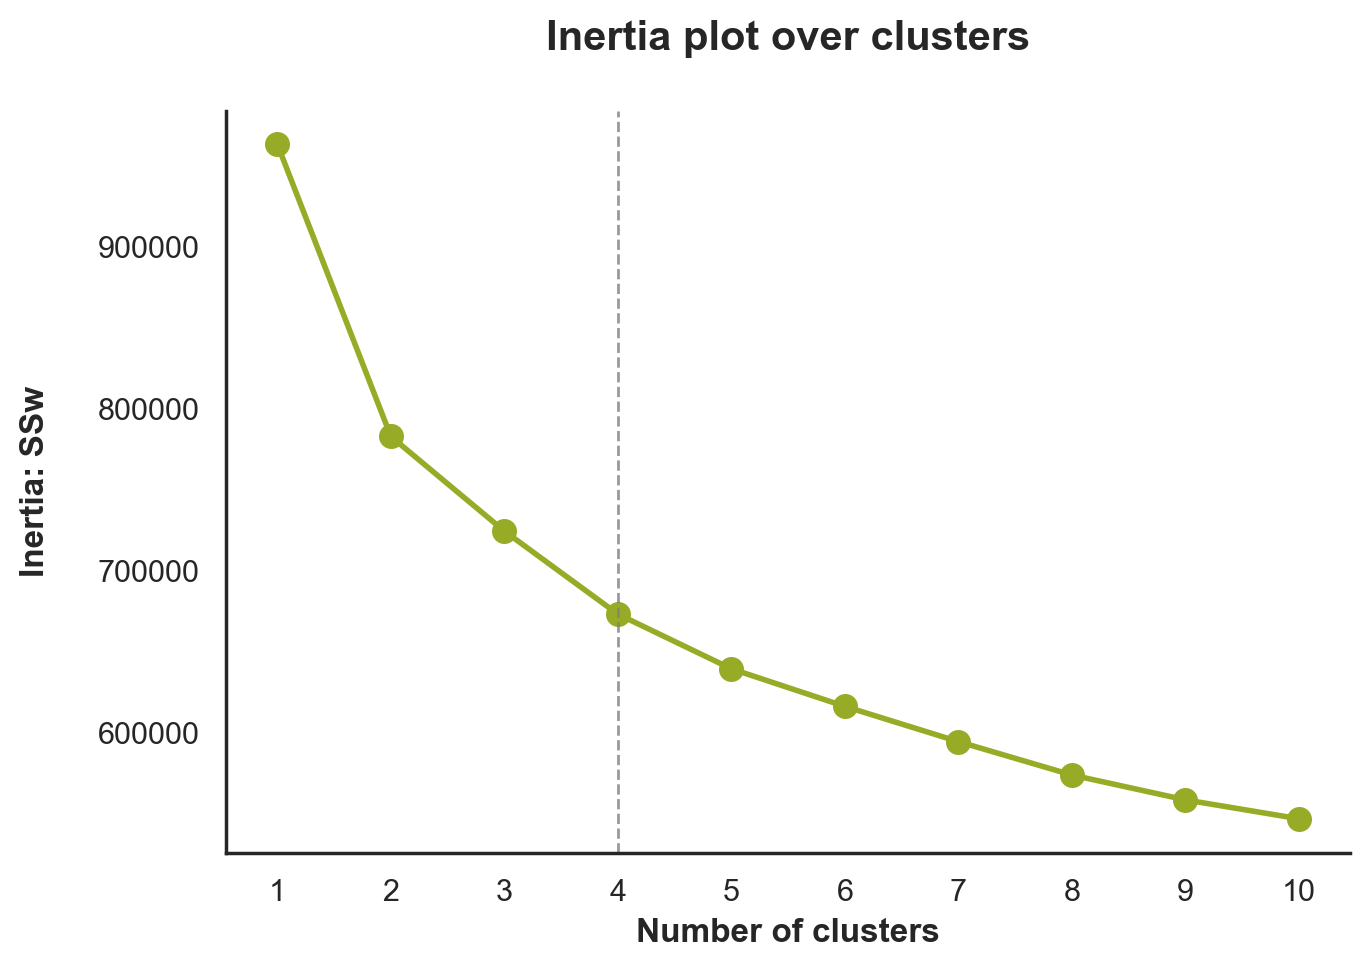

In [51]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot.png', dpi=300, bbox_inches='tight')
plt.show()

> Inertia measures the compactness of clusters- it is the sum of squared distances between each point and the center of its respective cluster (SSW Therefore, the lower the inertia, the better the separation of the clusters.

> Analyzing the graph, we can see that as the number of clusters increases, inertia decreases. This happens because as more clusters are created, the points within each cluster are closer to their respective centers. In the extreme case, where there is one observation per cluster, the inertia reaches its highest level. However, this is not desirable, which is why, similar to the R² metric, we need to find the "elbow" – the point where the rate of decrease in inertia begins to slow down. In this graph, the elbow appears to occur at k=4. This means that adding more clusters beyond this point results in only a marginal reduction in inertia, indicating that additional clusters do not provide significant benefits in terms of data separation.

> Since inertia is not a perfectly clear measure, we will rely on additional metrics to more robustly determine the optimal number of clusters.

>Note: We always test with up to 10 clusters, as using more than that stops making sense.


### **Silhouette Coefficient**

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

---


If $b > a$, then what?

Then the sample is closer to the points in the cluster it is assigned to (compared to the points in the next nearest cluster)

$$s \text{ is positive }$$


---


If $b = a$, then what?

Then the sample is equally distant to the points in the cluster it is assigned to as well as the points in the next closest cluster

$$s \text{ is 0}$$



---

If $b < a$, then what?

Then the sample is closer to the points in the next closest cluster (compared to the points in the same cluster).

$$s \text{ is negative }$$


---

**If the average value of $s$ is high, then what?**


"Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



For n_clusters = 2, the average silhouette_score is : 0.4467805108756405
For n_clusters = 3, the average silhouette_score is : 0.3432300185683443
For n_clusters = 4, the average silhouette_score is : 0.11649126849587607
For n_clusters = 5, the average silhouette_score is : 0.09742667150036624
For n_clusters = 6, the average silhouette_score is : 0.07975906576640285
For n_clusters = 7, the average silhouette_score is : 0.0859783312732523
For n_clusters = 8, the average silhouette_score is : 0.08659856234935707
For n_clusters = 9, the average silhouette_score is : 0.08909841829662973
For n_clusters = 10, the average silhouette_score is : 0.08968658664337323


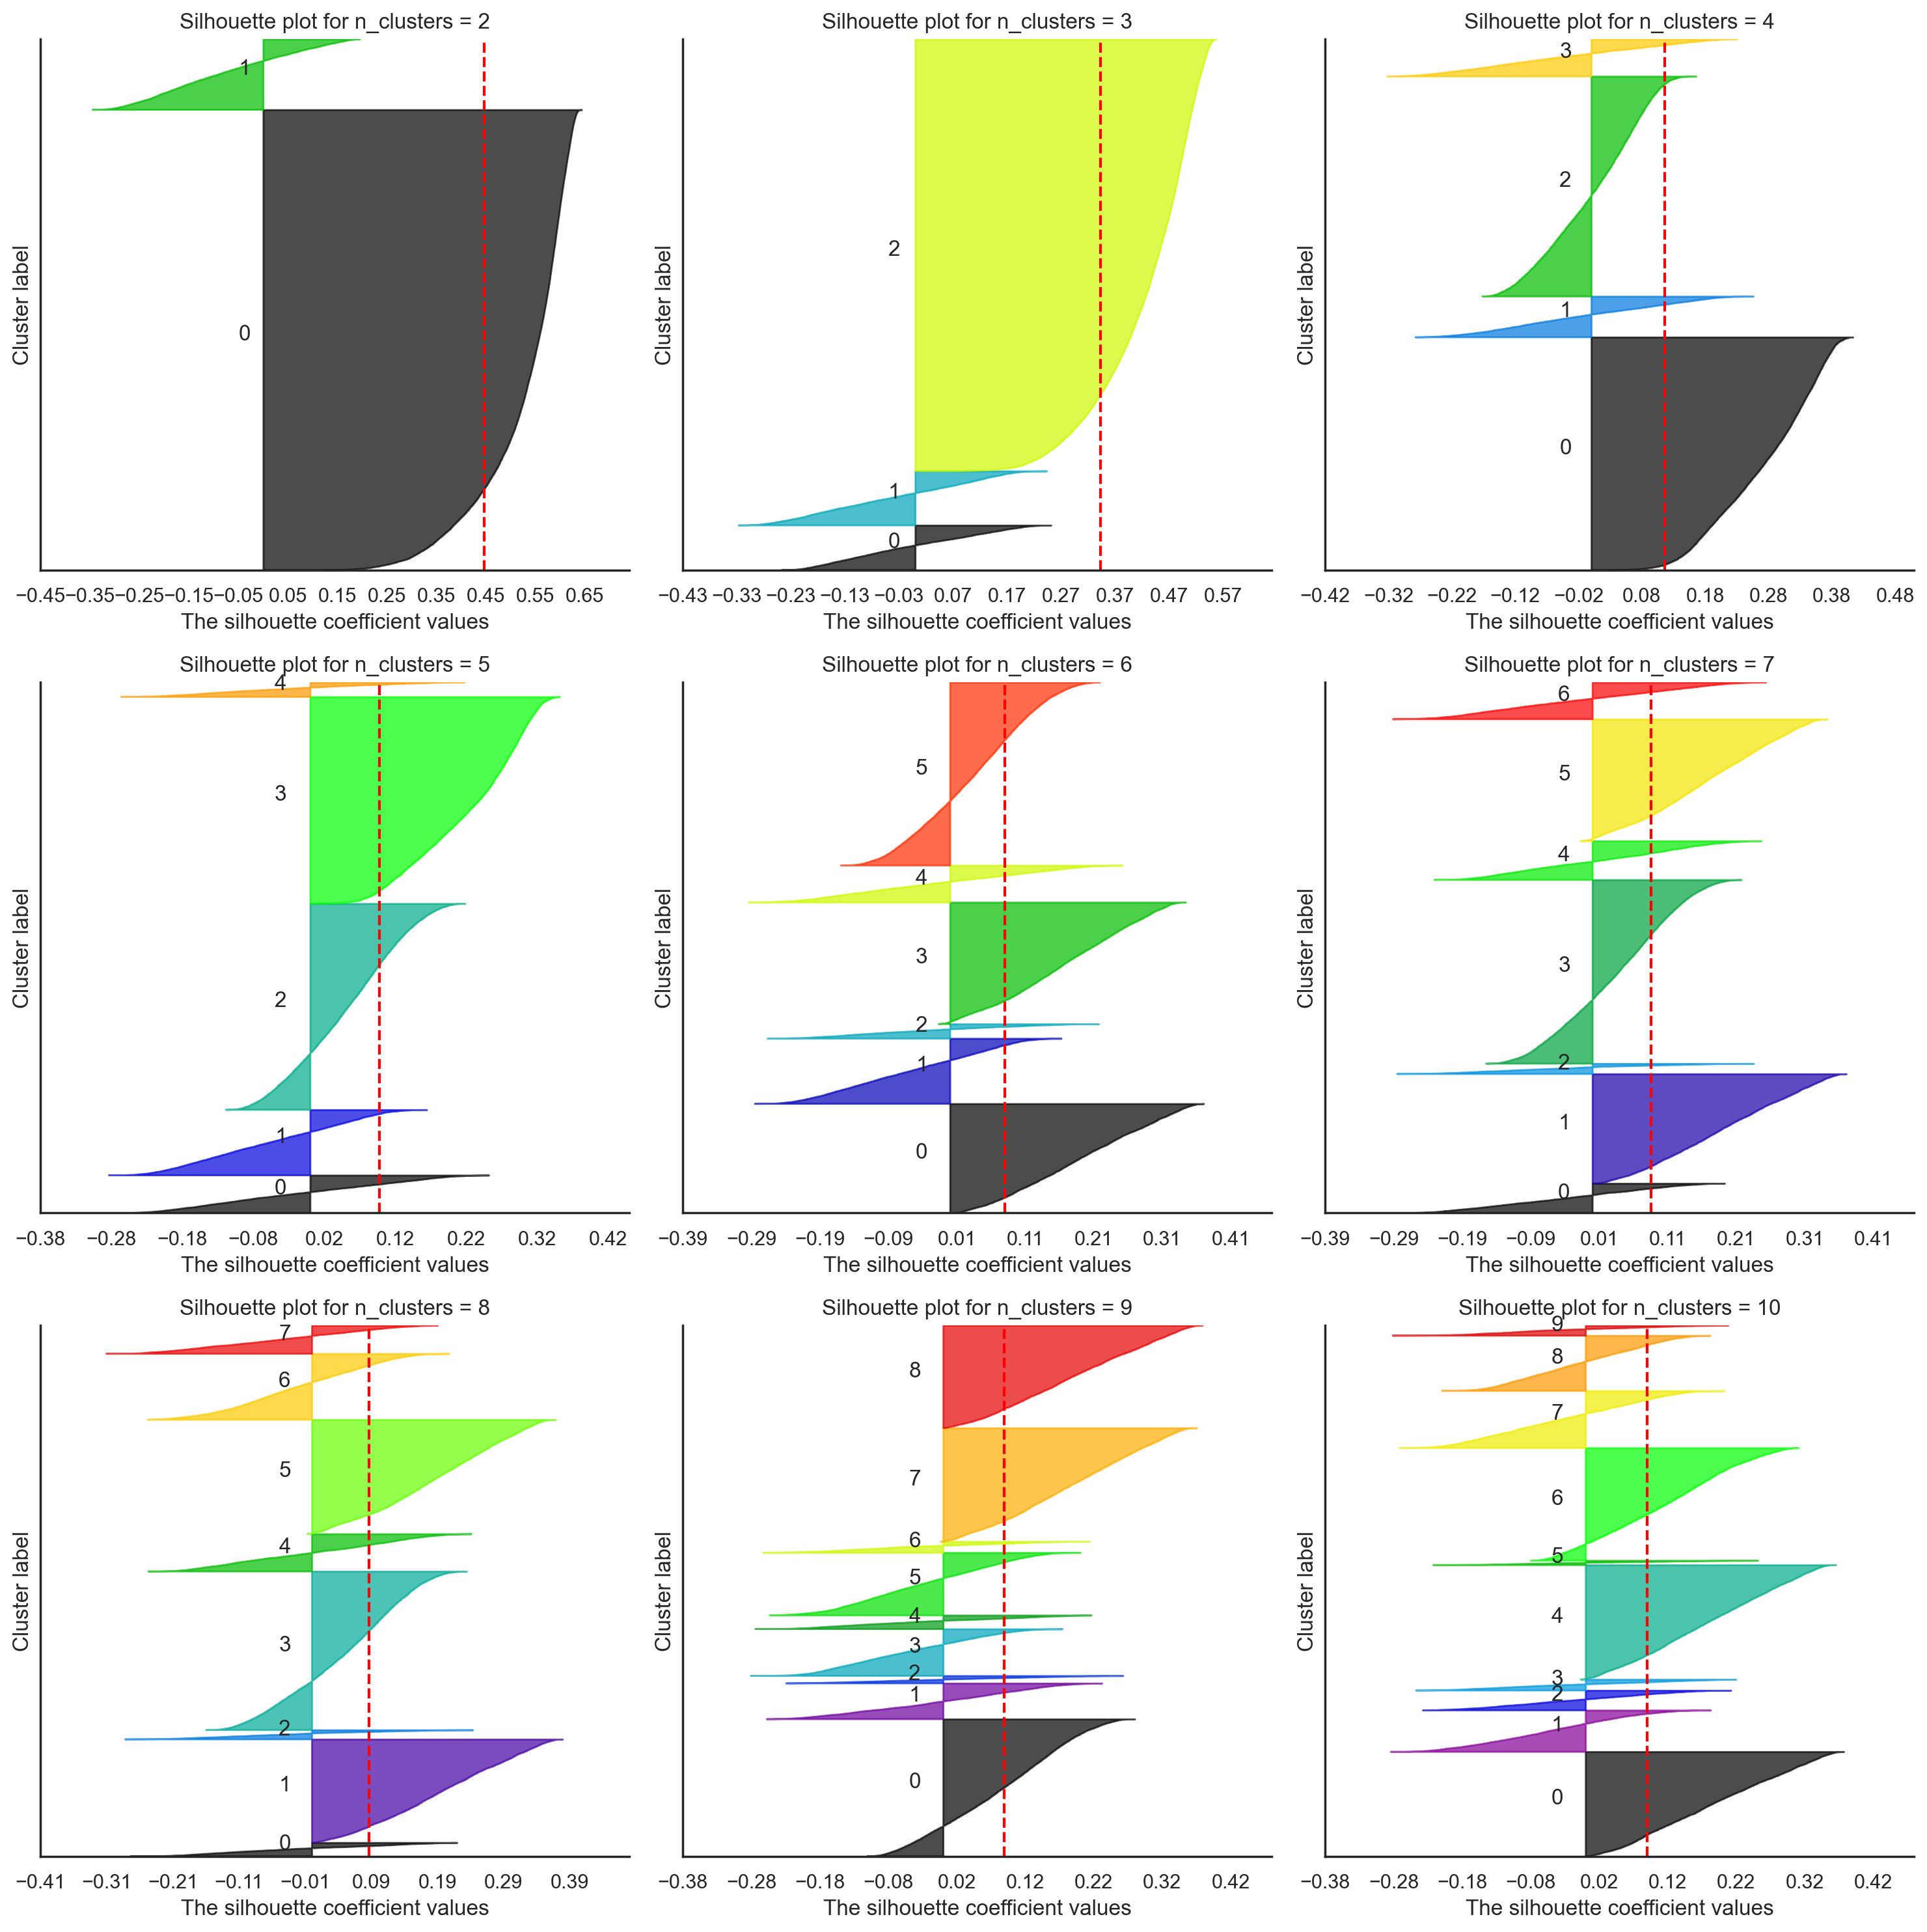

In [52]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Define the number of columns for the layout
num_columns = 3

# Store average silhouette scores
avg_silhouette = []
fig, axes = plt.subplots(
    nrows=(len(range_clusters)-1 + num_columns - 1) // num_columns,  # Calculate rows dynamically
    ncols=num_columns,
    figsize=(15, 5 * ((len(range_clusters)-1 + num_columns - 1) // num_columns))
)
axes = axes.flatten()  # Flatten the axes array to make indexing easier

for idx, nclus in enumerate(range_clusters):
    idx -= 1
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator seed for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[metric_features])

    # Compute the silhouette score for all samples
    silhouette_avg = silhouette_score(ABCDEats[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[metric_features], cluster_labels)

    # Plot on the corresponding subplot
    ax = axes[idx]
    y_lower = 10
    for i in range(nclus):
        # Aggregate and sort the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = cm.nipy_spectral(float(i) / nclus)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7
        )

        # Label the silhouette plots with cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next cluster
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for n_clusters = {nclus}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Draw the average silhouette score as a vertical line
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set x and y limits
    xmin, xmax = np.round(sample_silhouette_values.min() - 0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, len(ABCDEats[metric_features]) + (nclus + 1) * 10])

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.arange(xmin, xmax, 0.1))

# Hide unused subplots
for i in range(len(range_clusters), len(axes)):
    fig.delaxes(axes[i])

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

> As we can see from the graphs and the average Silhouette coefficients, the best solution is k=2. 

> Given that the previous metric suggested 4 clusters and this one suggests 2, we will choose the intermediate value, therefore opting for 3 clusters.

---

## **📏 Clustering Evaluation/Analysis**

### **Final KMeans clustering Solution**

In [53]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[metric_features])
km_labels

array([2, 2, 2, ..., 2, 2, 2])

In [54]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[metric_features], pd.Series(km_labels, name='labels', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels').mean()

chain_count  first_order  last_order  order_count  \
labels                                                      
0              0.31        -0.48        0.58         0.75   
1              2.00        -0.80        0.75         2.14   
2             -0.28         0.15       -0.15        -0.35   

        days_between_orders_per_order  CUI_Total_Amount_Spent  \
labels                                                          
0                                0.10                    1.85   
1                               -0.30                    1.14   
2                                0.03                   -0.33   

        CUI_Total_Food_Types  CUI_Avg_Amount_Spent  \
labels                                               
0                       0.55                  0.72   
1                       1.83                 -0.52   
2                      -0.29                 -0.01   

        CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  CUI_American_Cafe_Japanese_PC  \
labels                                                                          
0                                        -2.01                           1.43   
1                                         1.65                           0.68   
2                                         0.00                          -0.23   

        CUI_Chicken_Chinese_Noodle_PC  CUI_Healthy_NOTAmerican_PC  \
labels                                                              
0                                1.09                       -0.18   
1                                1.33                       -0.31   
2                               -0.28                        0.06   

        CUI_Indian_PC  CUI_Japanese_NOTBeverages_PC  CUI_Beverages_Thai_PC  \
labels                                                                       
0                0.19                         -0.03                  -0.04   
1                0.15                         -0.18                  -0.07   
2               -0.04                          0.03                   0.01   

        Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
labels                                                                   
0         0.56    0.55     0.56       0.48      0.37    0.41      0.35   
1         1.31    1.35     1.37       1.39      1.37    1.22      1.27   
2        -0.22   -0.23    -0.23      -0.22     -0.21   -0.19     -0.19   

        HR_Lunch_Dinner_PC  HR_LateNight_Breakfast_PC  HR_Evening_PC  \
labels                                                                 
0                    -1.01                       2.97          -0.19   
1                     3.55                       0.80          -0.16   
2                    -0.34                      -0.41           0.04   

        HR_AfternoonSnack_PC  
labels                        
0                       0.11  
1                       0.14  
2                      -0.03

In [55]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels'].value_counts().sort_index()
cluster_freq = df_concat['labels'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n     %
Cluster             
0         2625  8.39
1         3190 10.20
2        25464 81.41

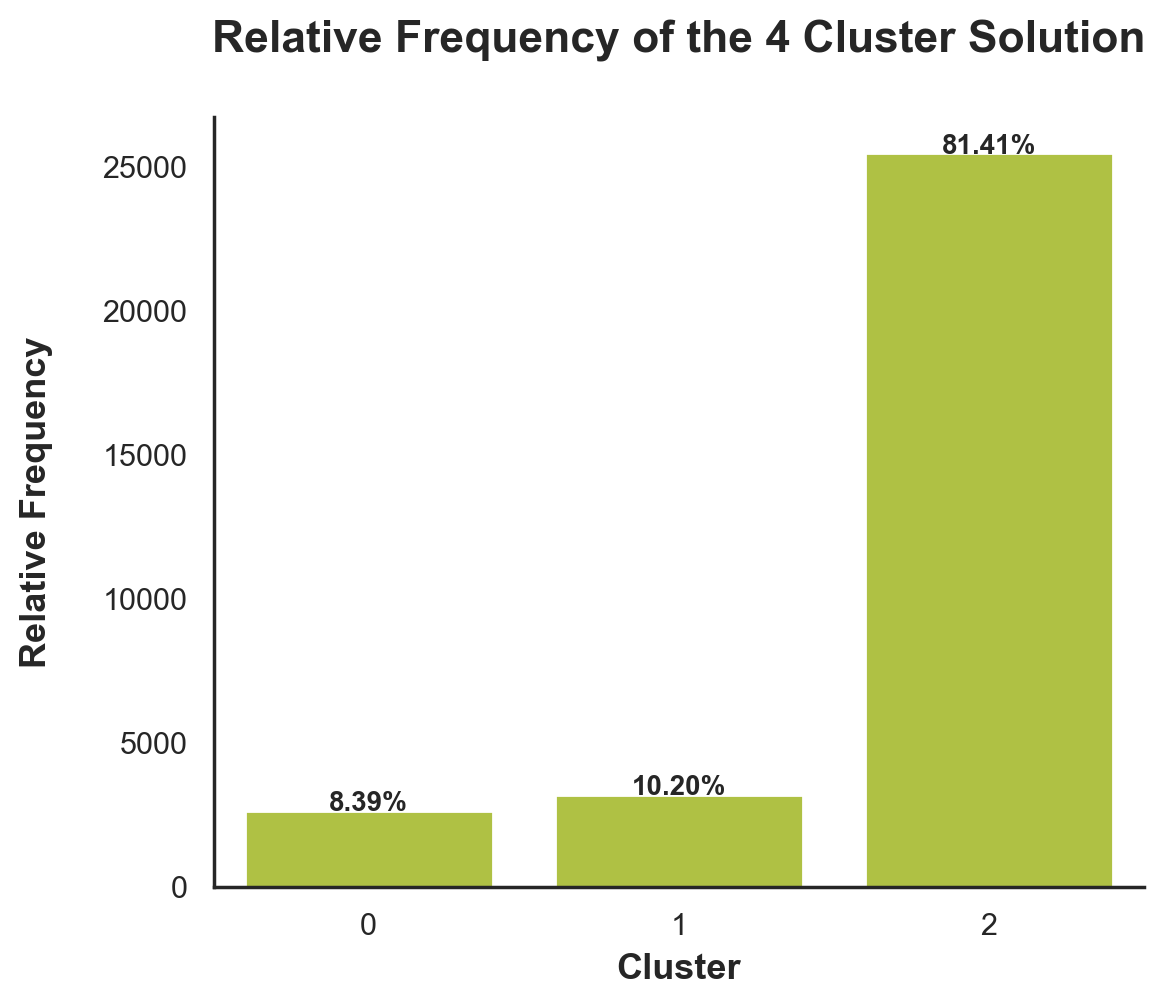

In [56]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['n'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 3 Cluster Solution\n', fontsize=16, fontweight='bold')

# Add the percentage values on top of the bars
for i in range(cluster_freq_df.shape[0]):
    plt.text(i, cluster_freq_df['n'][i] + 5, f"{cluster_freq_df['%'][i]:.2f}%", ha='center', fontsize=10, fontweight='bold')

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# using R² (Evaluation Metric)
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[metric_features])  # get total sum of squares
ssw_labels = df_concat[metric_features + ["labels"]].groupby(by='labels')[metric_features].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.2479958842754945

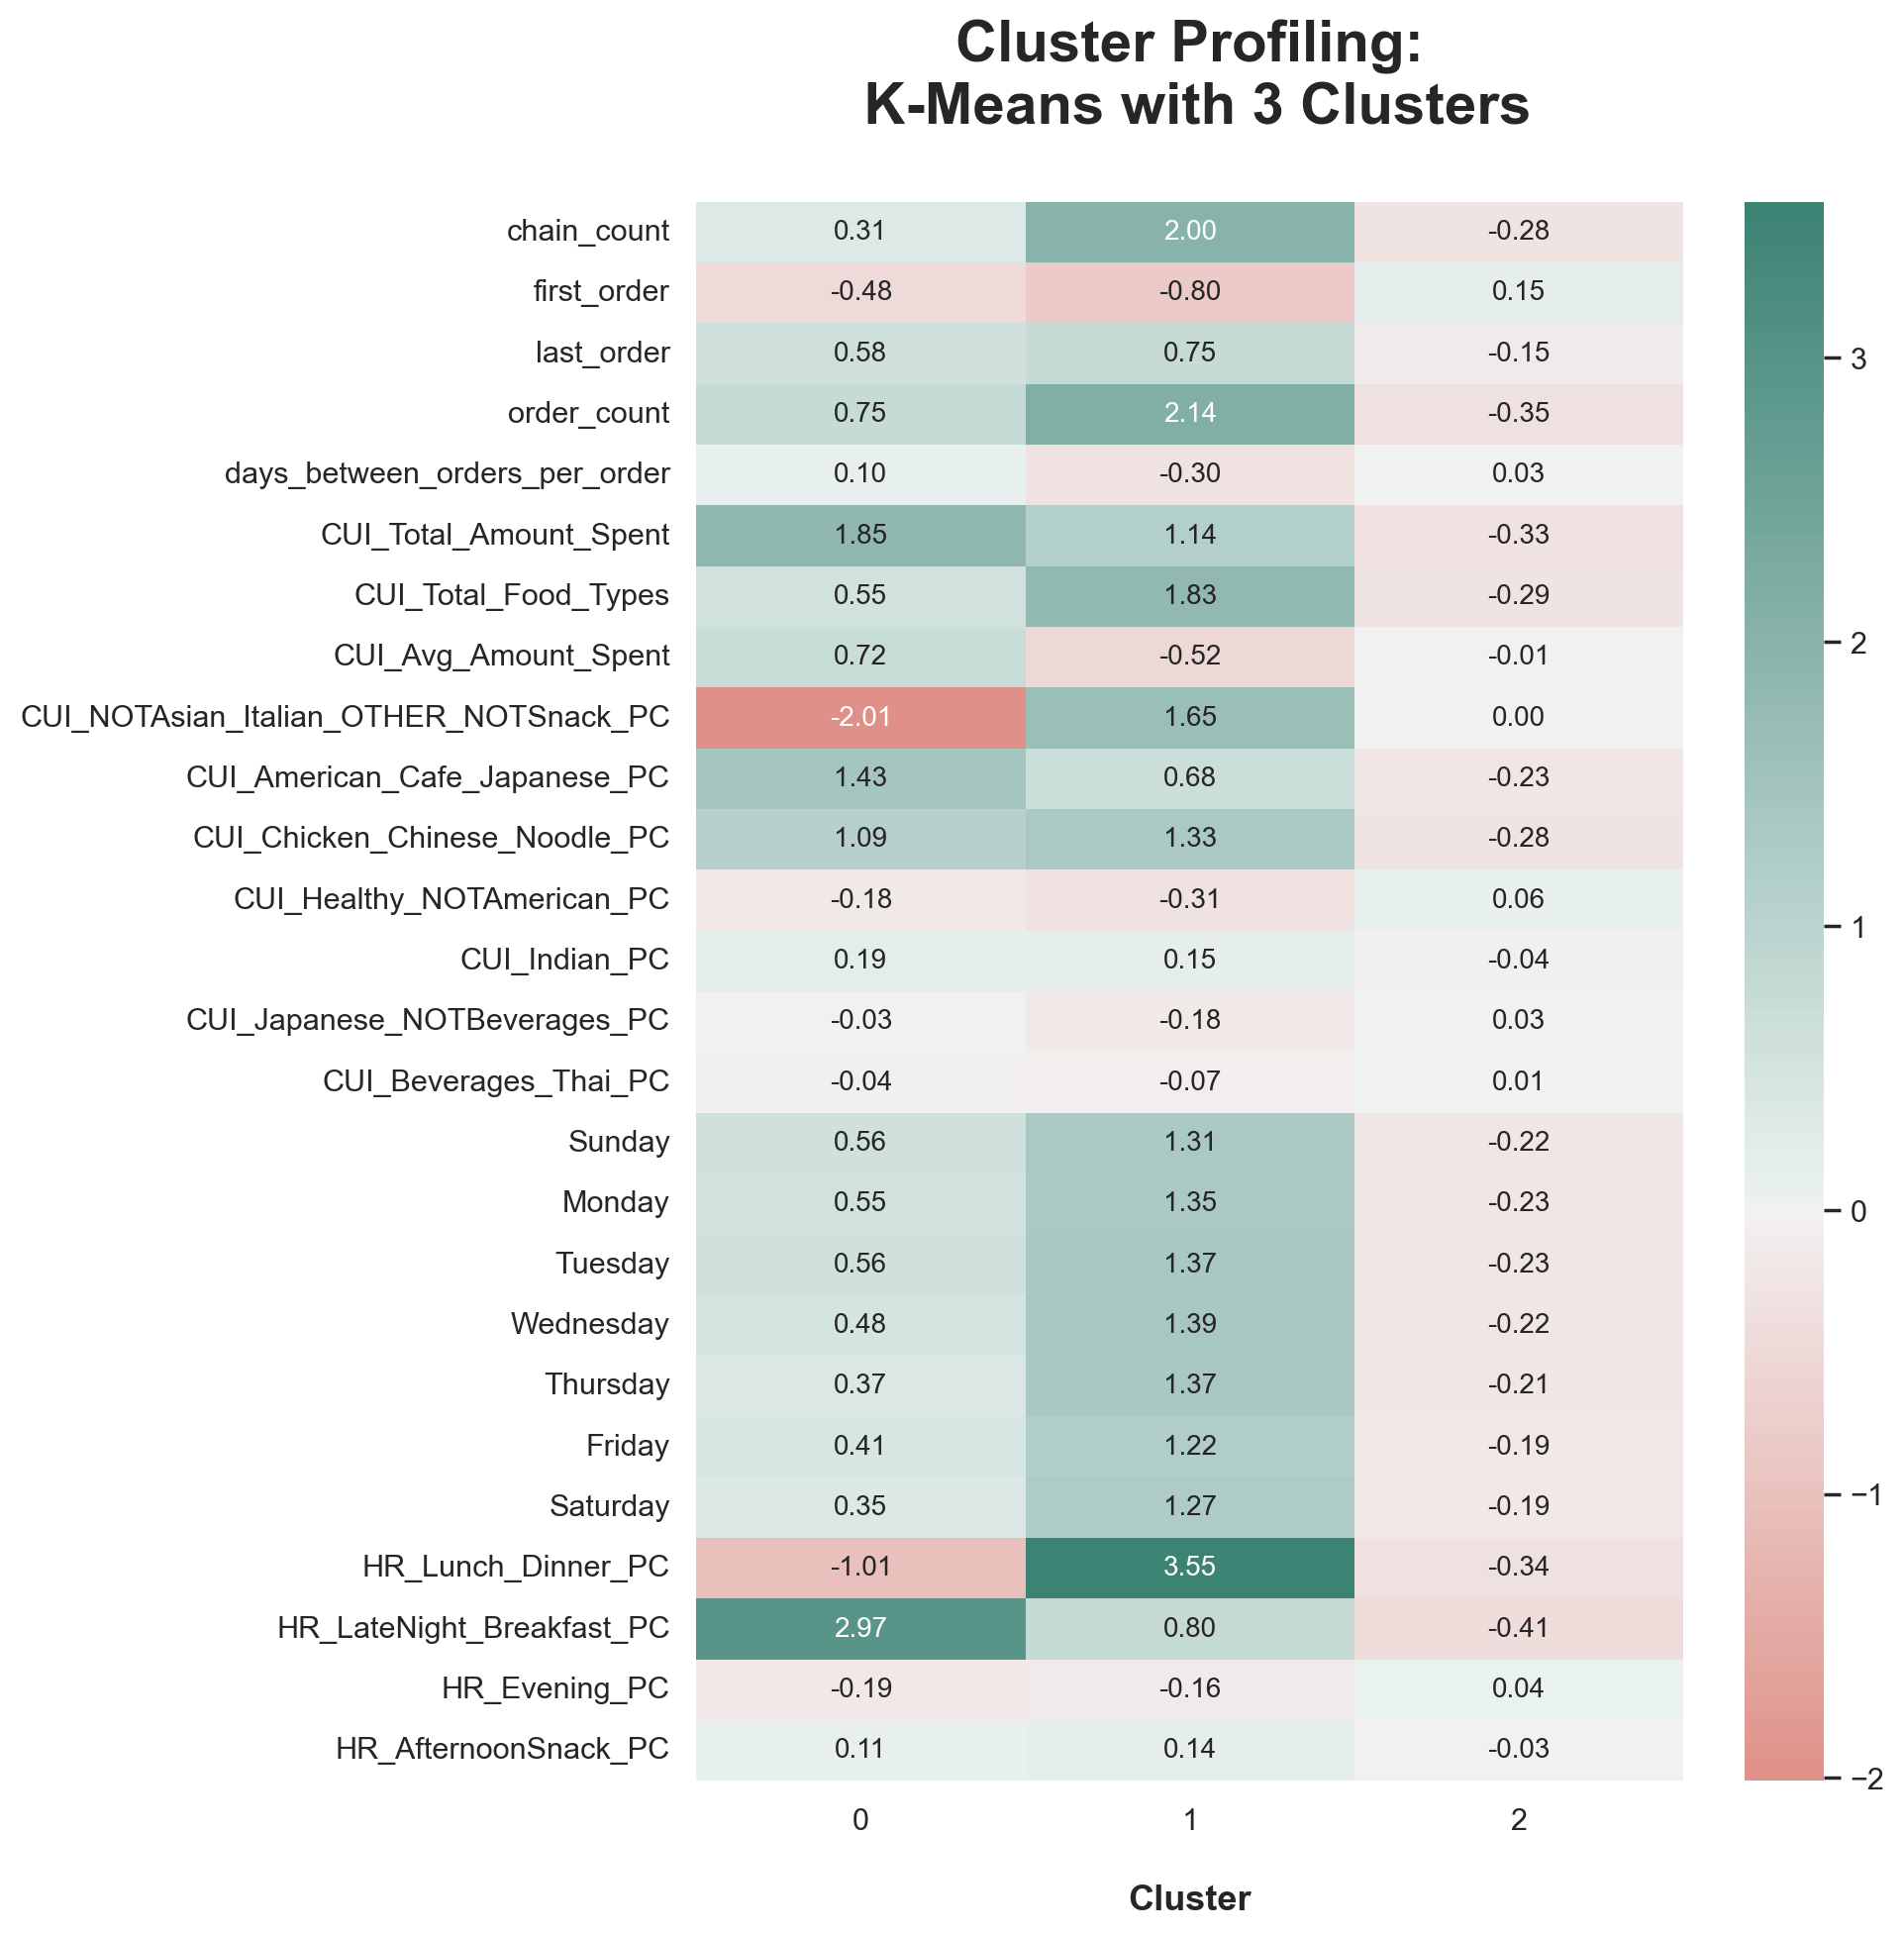

In [58]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 10))

# Color palette for the heatmap with center = 0 (white)
cmap_ = sns.diverging_palette(15, 530, as_cmap=True)
sns.heatmap(df_concat.groupby('labels').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\n K-Means with 3 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Cluster_Profiling.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
# Save the cluster labels to the ABCDEats DataFrame
ABCDEats = pd.concat([ABCDEats, pd.Series(km_labels, name='labels', index=ABCDEats.index)], axis=1)

---

# **👀 Different Perspectives**

In [60]:
# List of variables in different perspectives
value_vars = ['CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 
              'order_count', 
              'days_between_orders_per_order', 
              'chain_count']
behavior_vars = ['first_order', 'last_order',
                 
                 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 
                 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 
                 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',
                 
                 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC',
                 
                 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

## **1. Value-Based Segmentation**

In [61]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[value_vars])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

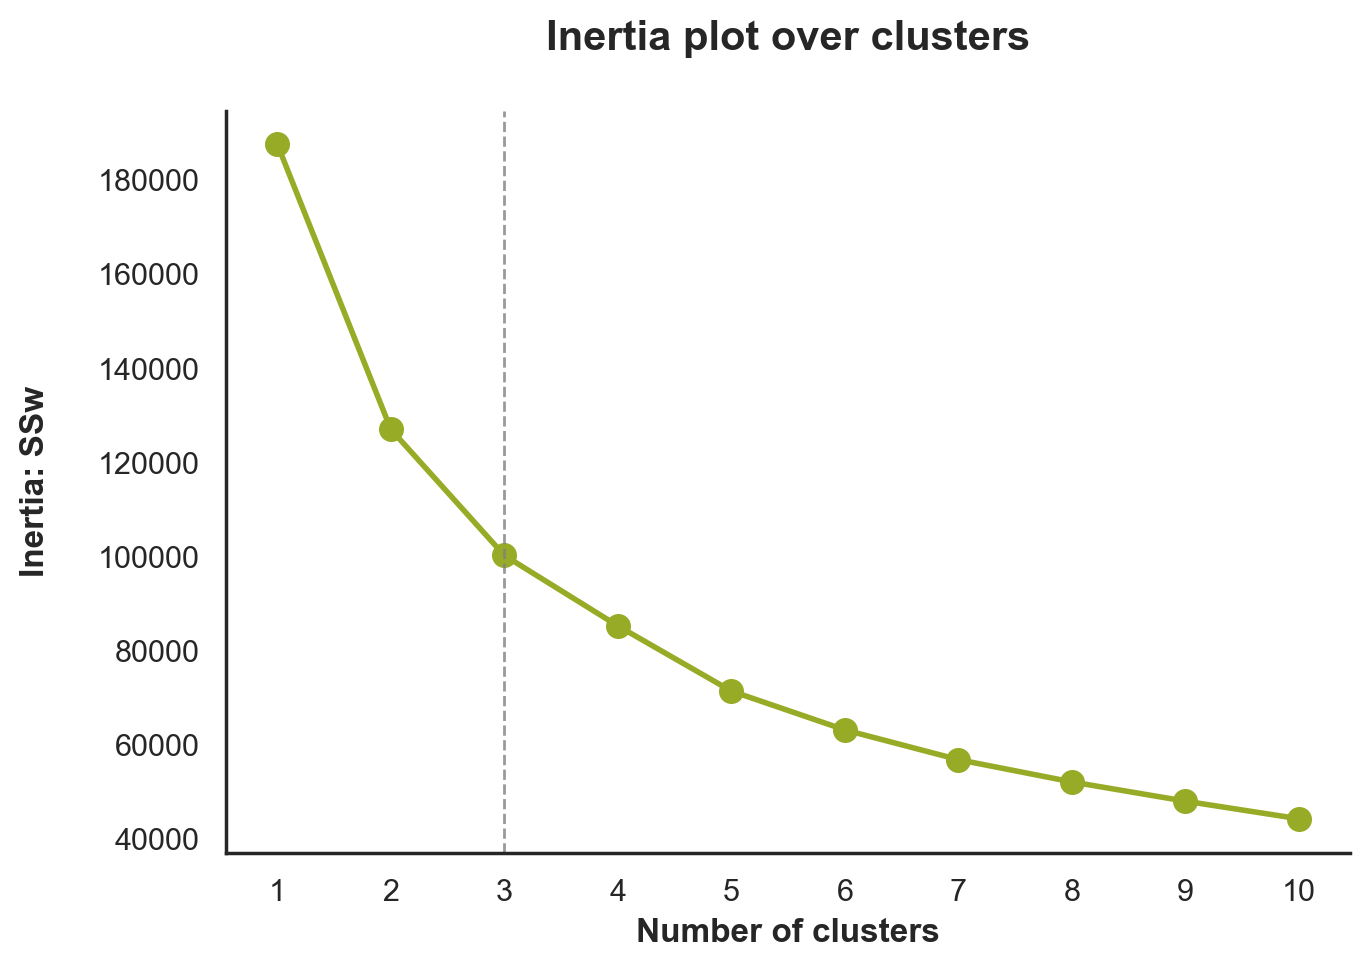

In [62]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=3, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

>In this plot, the elbow appears to occur at k=3. This means that adding more clusters beyond this point results in only a marginal reduction in inertia, indicating that additional clusters do not provide significant benefits in terms of data separation.

> Since inertia is not a perfectly clear measure, we will rely on additional metrics to more robustly determine the optimal number of clusters.

For n_clusters = 2, the average silhouette_score is : 0.46217134544775085
For n_clusters = 3, the average silhouette_score is : 0.28531918171514126
For n_clusters = 4, the average silhouette_score is : 0.28523455245440277
For n_clusters = 5, the average silhouette_score is : 0.3063607785218151
For n_clusters = 6, the average silhouette_score is : 0.3103405729953202
For n_clusters = 7, the average silhouette_score is : 0.2834072315731898
For n_clusters = 8, the average silhouette_score is : 0.2873331335342874
For n_clusters = 9, the average silhouette_score is : 0.2853711988318279
For n_clusters = 10, the average silhouette_score is : 0.2820781020226256


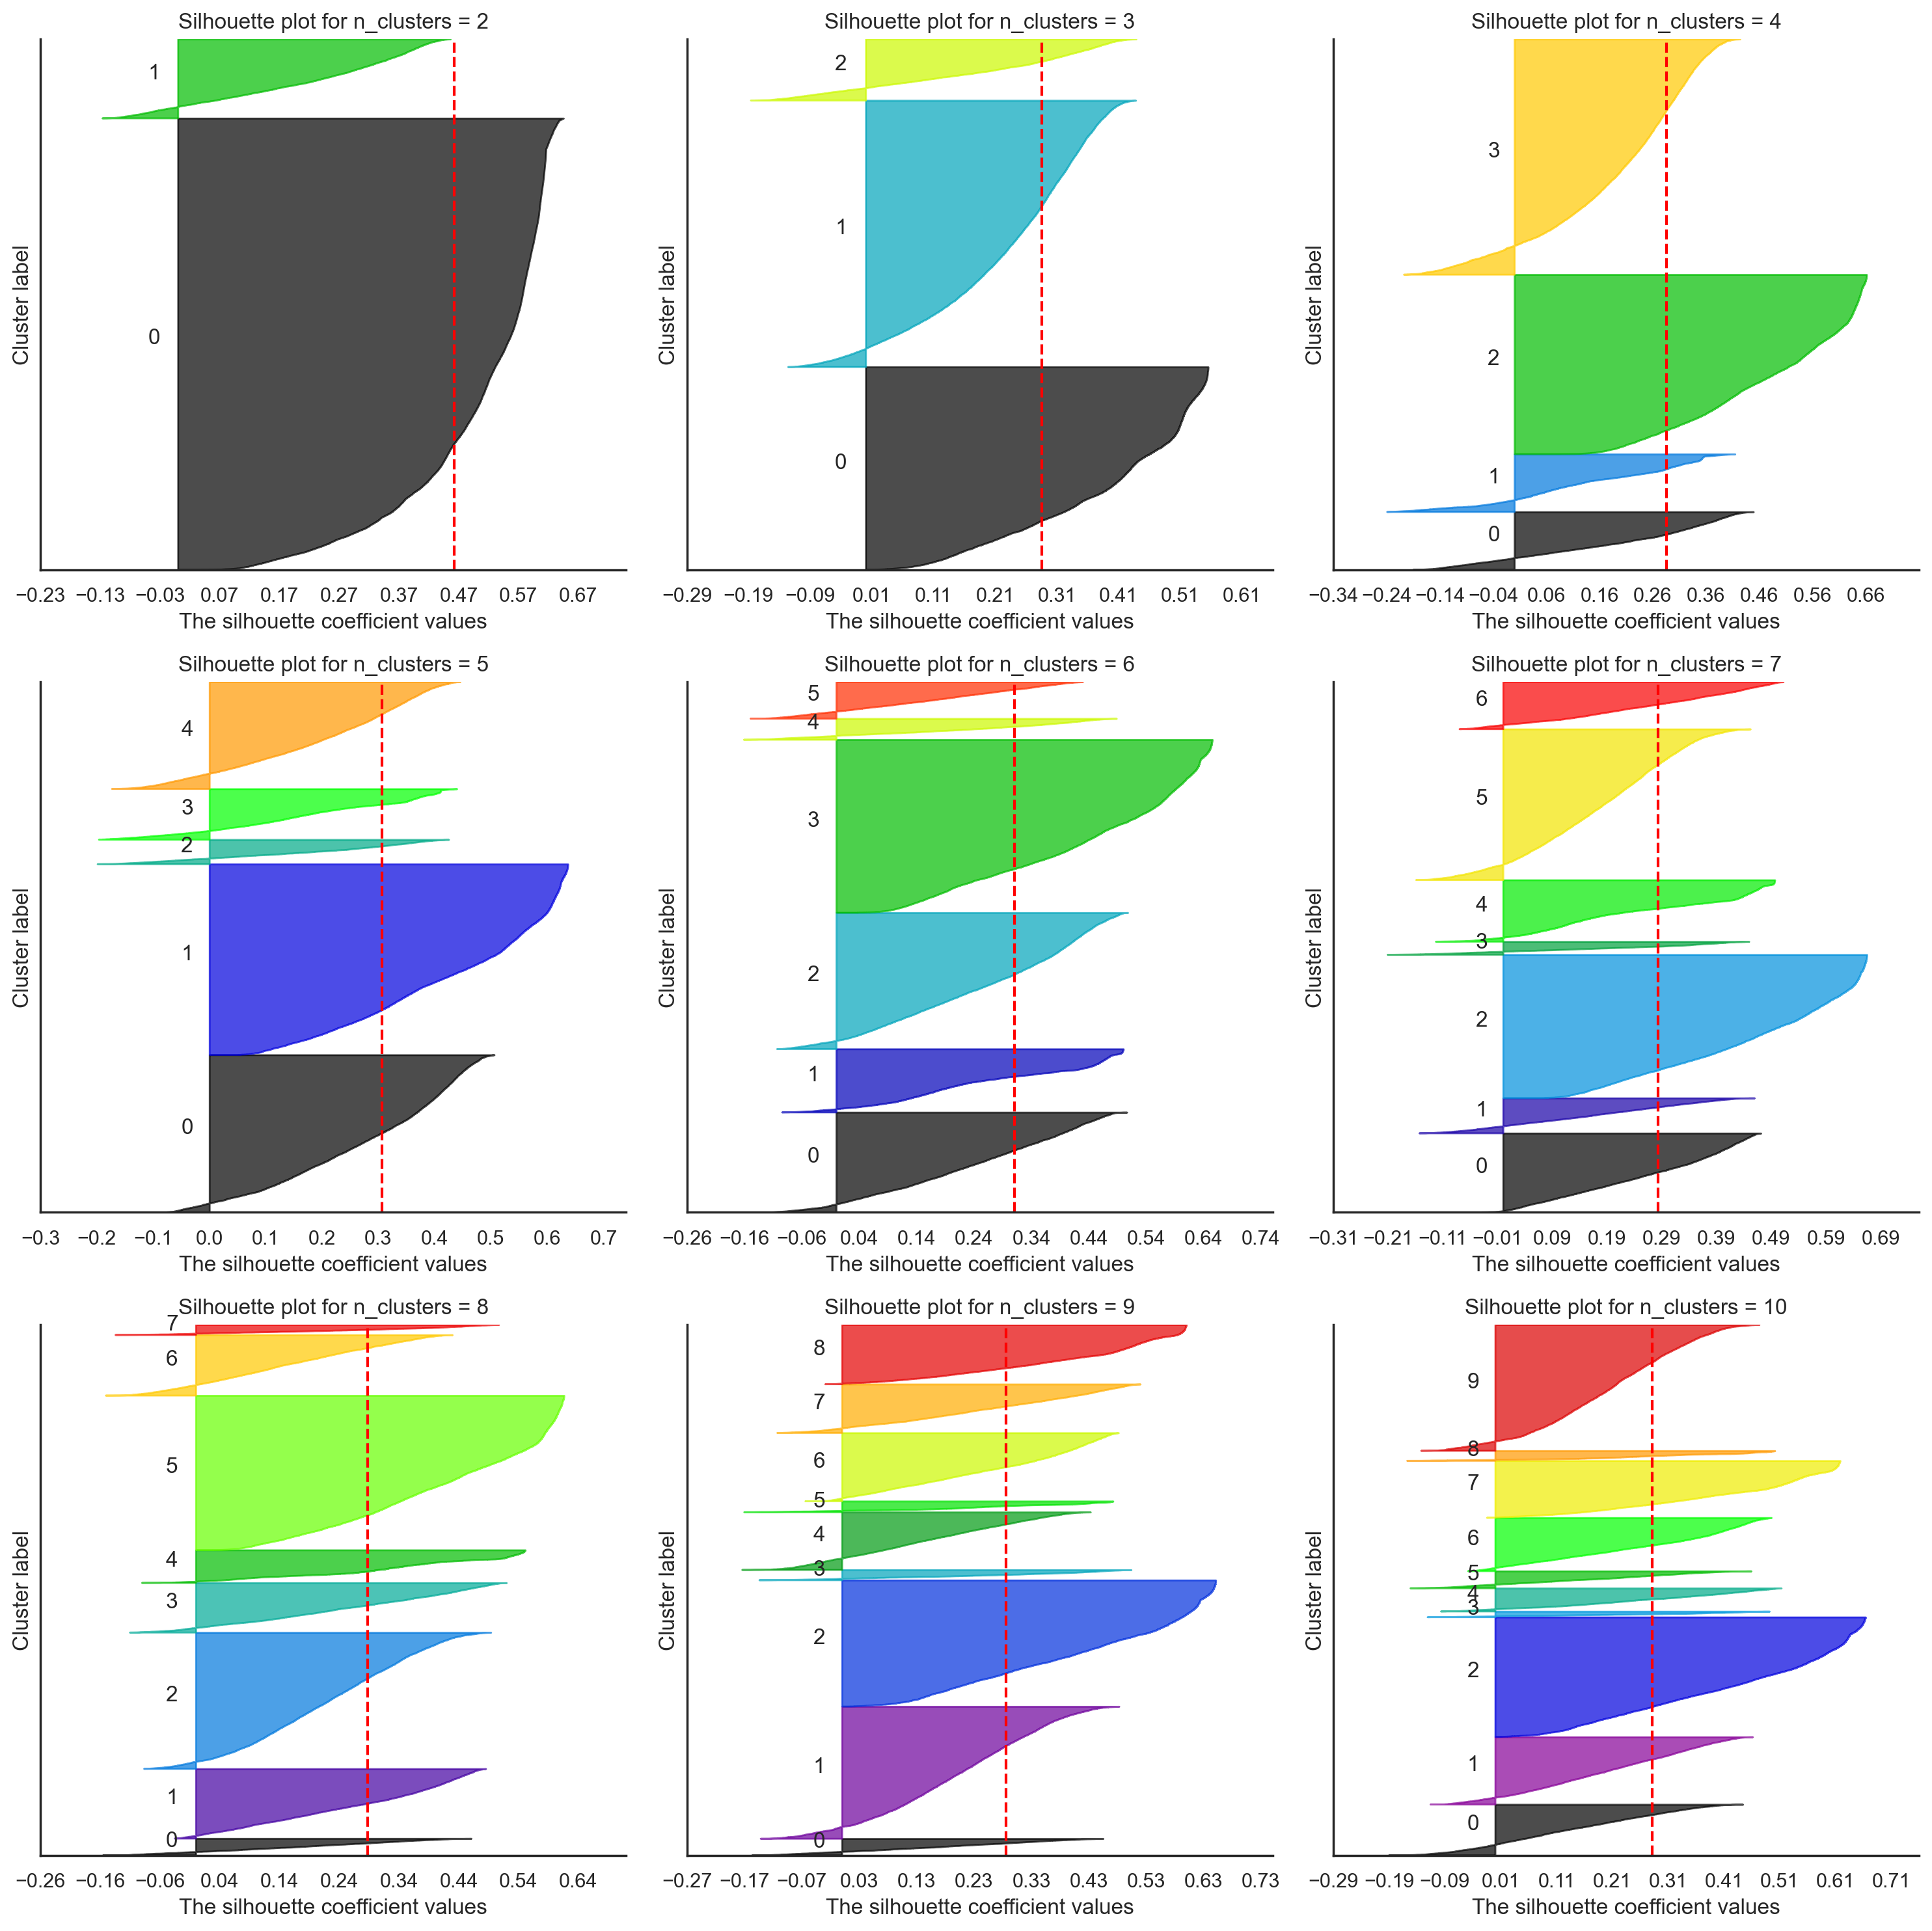

In [63]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Define the number of columns for the layout
num_columns = 3

# Store average silhouette scores
avg_silhouette = []
fig, axes = plt.subplots(
    nrows=(len(range_clusters)-1 + num_columns - 1) // num_columns,  # Calculate rows dynamically
    ncols=num_columns,
    figsize=(15, 5 * ((len(range_clusters)-1 + num_columns - 1) // num_columns))
)
axes = axes.flatten()  # Flatten the axes array to make indexing easier

for idx, nclus in enumerate(range_clusters):
    idx -= 1
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator seed for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[value_vars])

    # Compute the silhouette score for all samples
    silhouette_avg = silhouette_score(ABCDEats[value_vars], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[value_vars], cluster_labels)

    # Plot on the corresponding subplot
    ax = axes[idx]
    y_lower = 10
    for i in range(nclus):
        # Aggregate and sort the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = cm.nipy_spectral(float(i) / nclus)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7
        )

        # Label the silhouette plots with cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next cluster
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for n_clusters = {nclus}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Draw the average silhouette score as a vertical line
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set x and y limits
    xmin, xmax = np.round(sample_silhouette_values.min() - 0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, len(ABCDEats[value_vars]) + (nclus + 1) * 10])

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.arange(xmin, xmax, 0.1))

# Hide unused subplots
for i in range(len(range_clusters), len(axes)):
    fig.delaxes(axes[i])

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

> As we can see from the graphs and the average Silhouette coefficients, the best solution is k=2.

> However, since the previous metric suggested 3 clusters and this one suggests 2, we will choose 3 clusters, as 2 may be too few to provide a meaningful solution.

### **📏 Clustering Evaluation/Analysis** [Value-Based Segmentation]

#### **Final KMeans clustering Solution** [Value-Based Segmentation]

In [64]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[value_vars])
km_labels

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[value_vars], pd.Series(km_labels, name='labels_value', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels_value').mean()

CUI_Total_Amount_Spent  CUI_Total_Food_Types  \
labels_value                                                 
0                              -0.43                 -0.68   
1                              -0.06                  0.10   
2                               1.70                  1.83   

              CUI_Avg_Amount_Spent  order_count  \
labels_value                                      
0                             0.34        -0.60   
1                            -0.20        -0.03   
2                            -0.25         2.14   

              days_between_orders_per_order  chain_count  
labels_value                                              
0                                     -0.85        -0.52  
1                                      0.72        -0.04  
2                                     -0.31         1.93

In [66]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels_value'].value_counts().sort_index()
cluster_freq = df_concat['labels_value'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n     %
Cluster             
0        11953 38.21
1        15721 50.26
2         3605 11.53

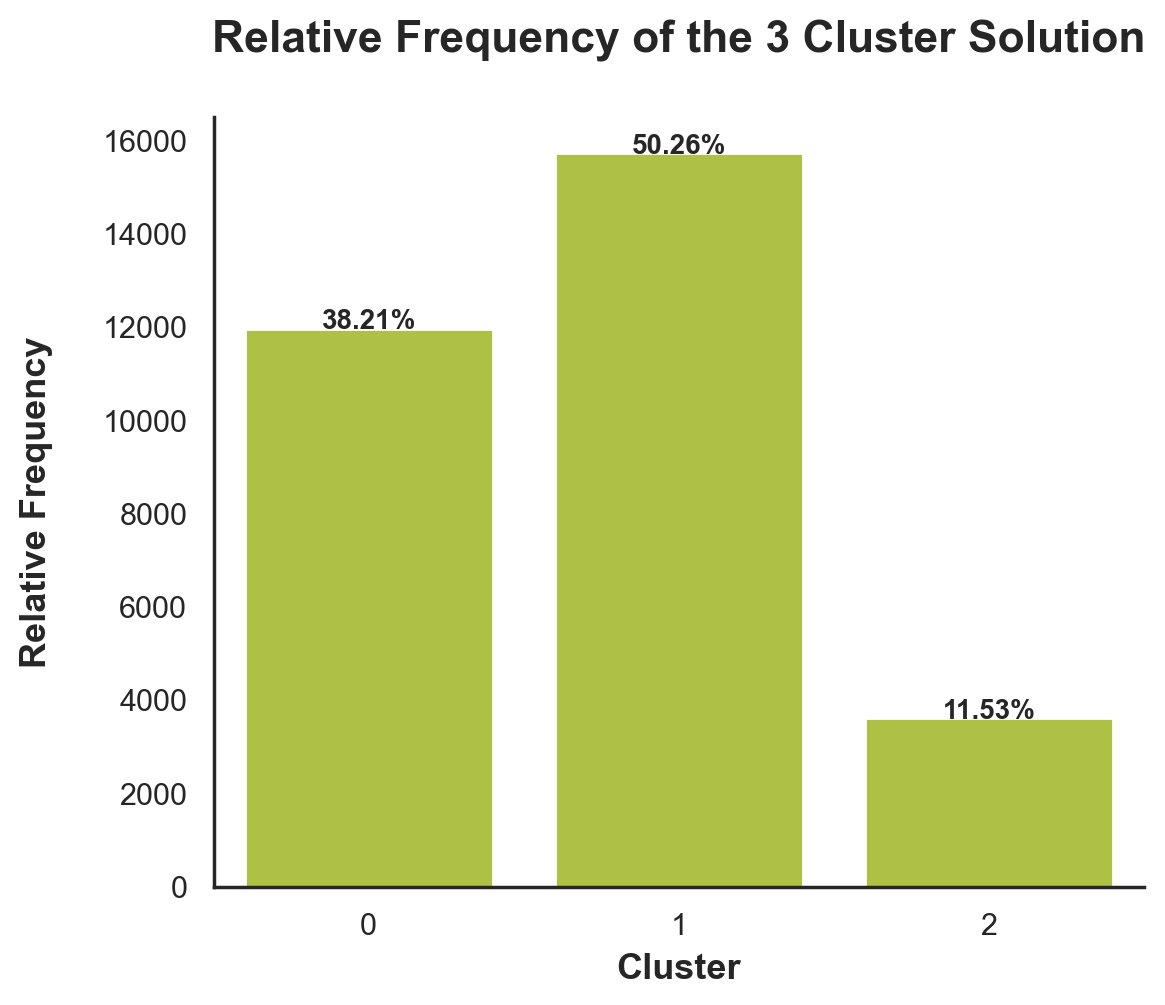

In [67]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['n'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 3 Cluster Solution\n', fontsize=16, fontweight='bold')

# Add the percentage values on top of the bars
for i in range(cluster_freq_df.shape[0]):
    plt.text(i, cluster_freq_df['n'][i] + 5, f"{cluster_freq_df['%'][i]:.2f}%", ha='center', fontsize=10, fontweight='bold')

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
# using R² (Evaluation Metric - Value-Based Segmentation)
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[value_vars])  # get total sum of squares
ssw_labels = df_concat[value_vars + ["labels_value"]].groupby(by='labels_value')[value_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.46590140415271897

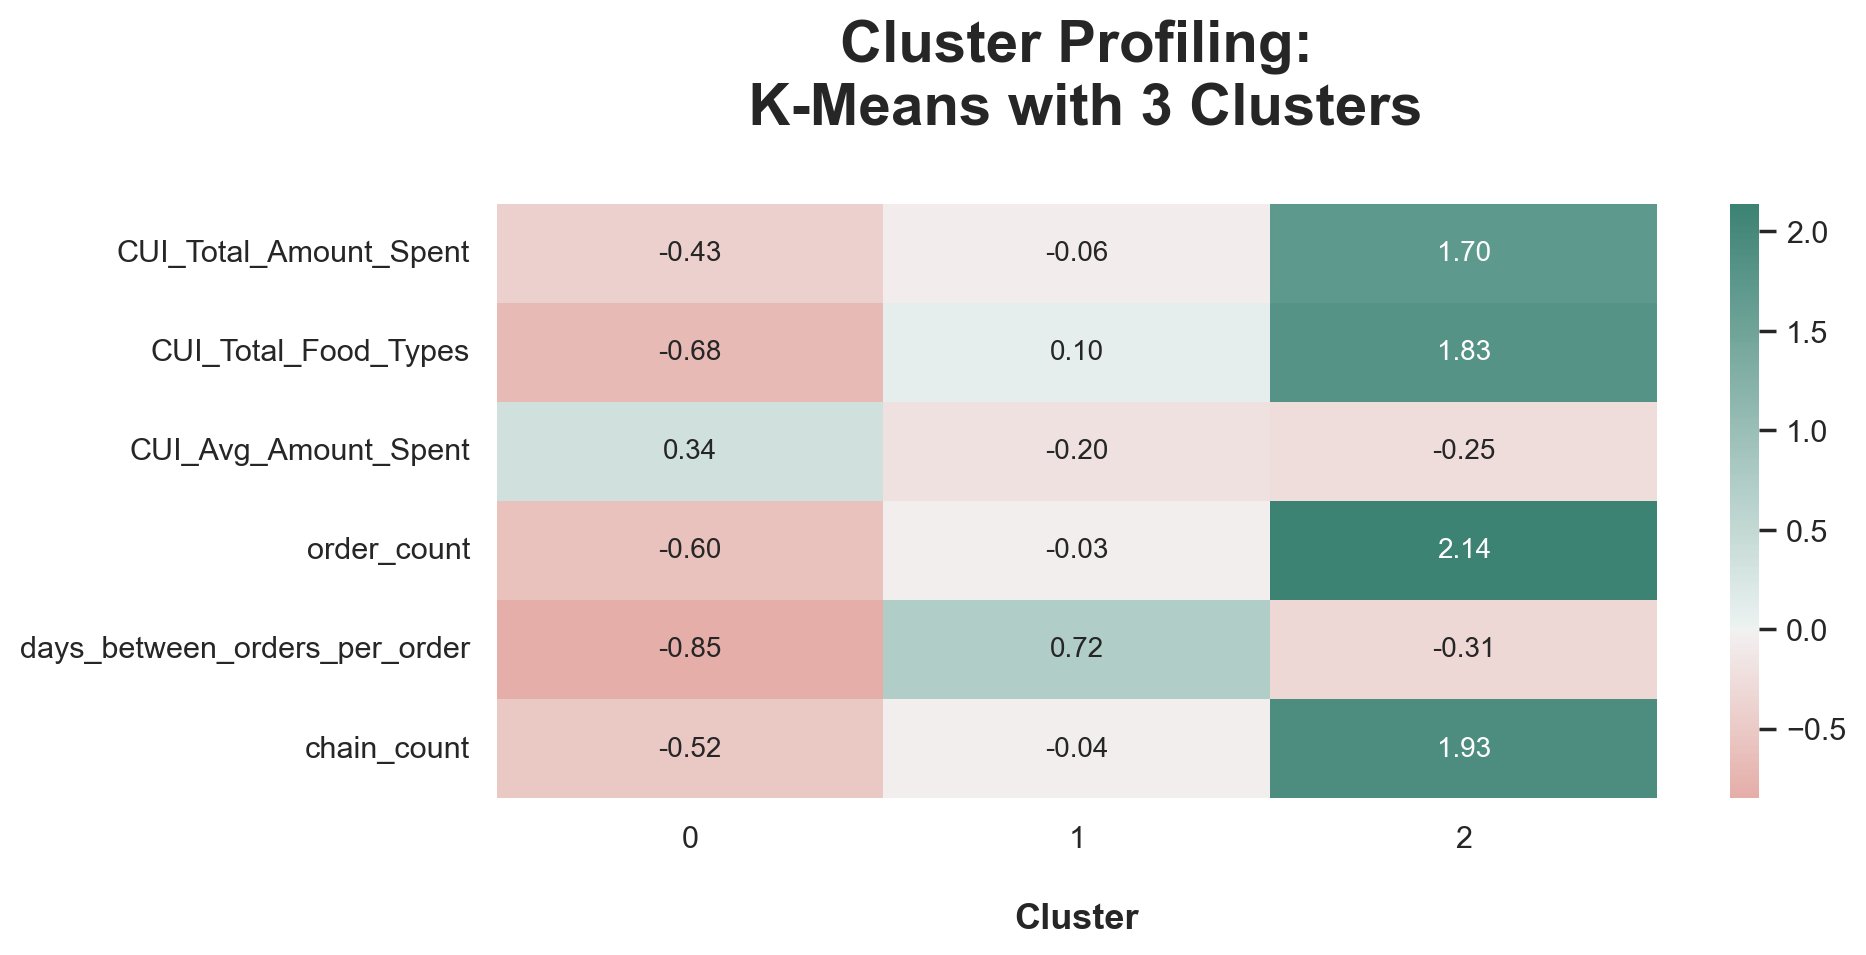

In [69]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(df_concat.groupby('labels_value').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\n K-Means with 3 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
# Save the cluster labels to the ABCDEats DataFrame
ABCDEats = pd.concat([ABCDEats, pd.Series(km_labels, name='labels_value', index=ABCDEats.index)], axis=1)

---

## **2. Behavior-Based Segmentation**

In [71]:
# Define the range of clusters
range_clusters = range(1, 11)

# Calculate inertia for each number of clusters
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[behavior_vars])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

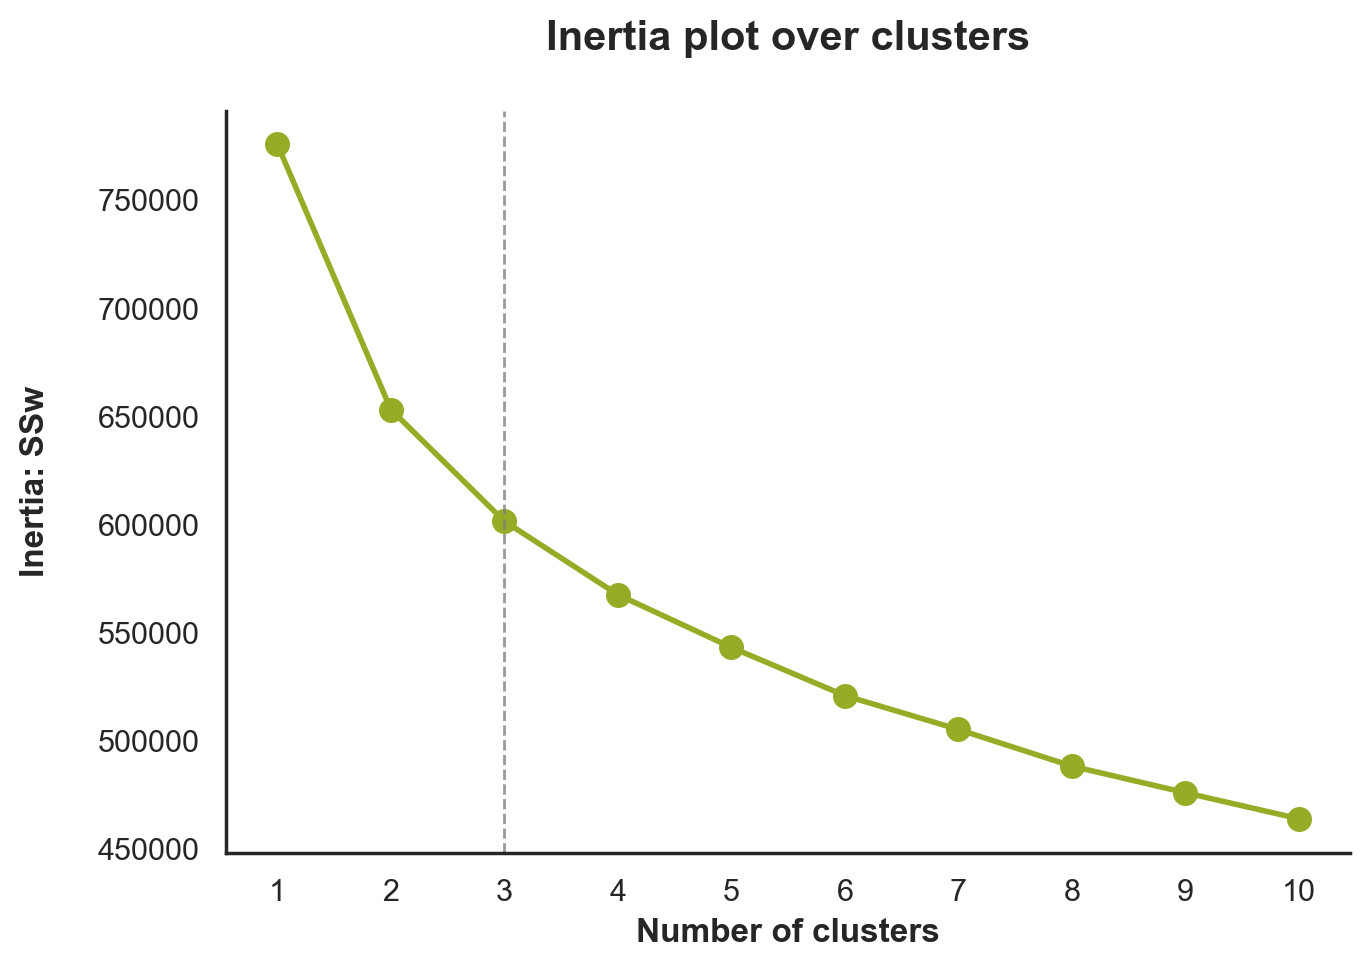

In [72]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=3, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

>In this plot, the elbow appears to occur at k=3. This means that adding more clusters beyond this point results in only a marginal reduction in inertia, indicating that additional clusters do not provide significant benefits in terms of data separation.

> Since inertia is not a perfectly clear measure, we will rely on additional metrics to more robustly determine the optimal number of clusters.

For n_clusters = 2, the average silhouette_score is : 0.4603277729230423
For n_clusters = 3, the average silhouette_score is : 0.35498817643455033
For n_clusters = 4, the average silhouette_score is : 0.2332136542936236
For n_clusters = 5, the average silhouette_score is : 0.06636650285231845
For n_clusters = 6, the average silhouette_score is : 0.07085329640776059
For n_clusters = 7, the average silhouette_score is : 0.07639410140320442
For n_clusters = 8, the average silhouette_score is : 0.07664757975837624
For n_clusters = 9, the average silhouette_score is : 0.08056424770479126
For n_clusters = 10, the average silhouette_score is : 0.08452924877812405


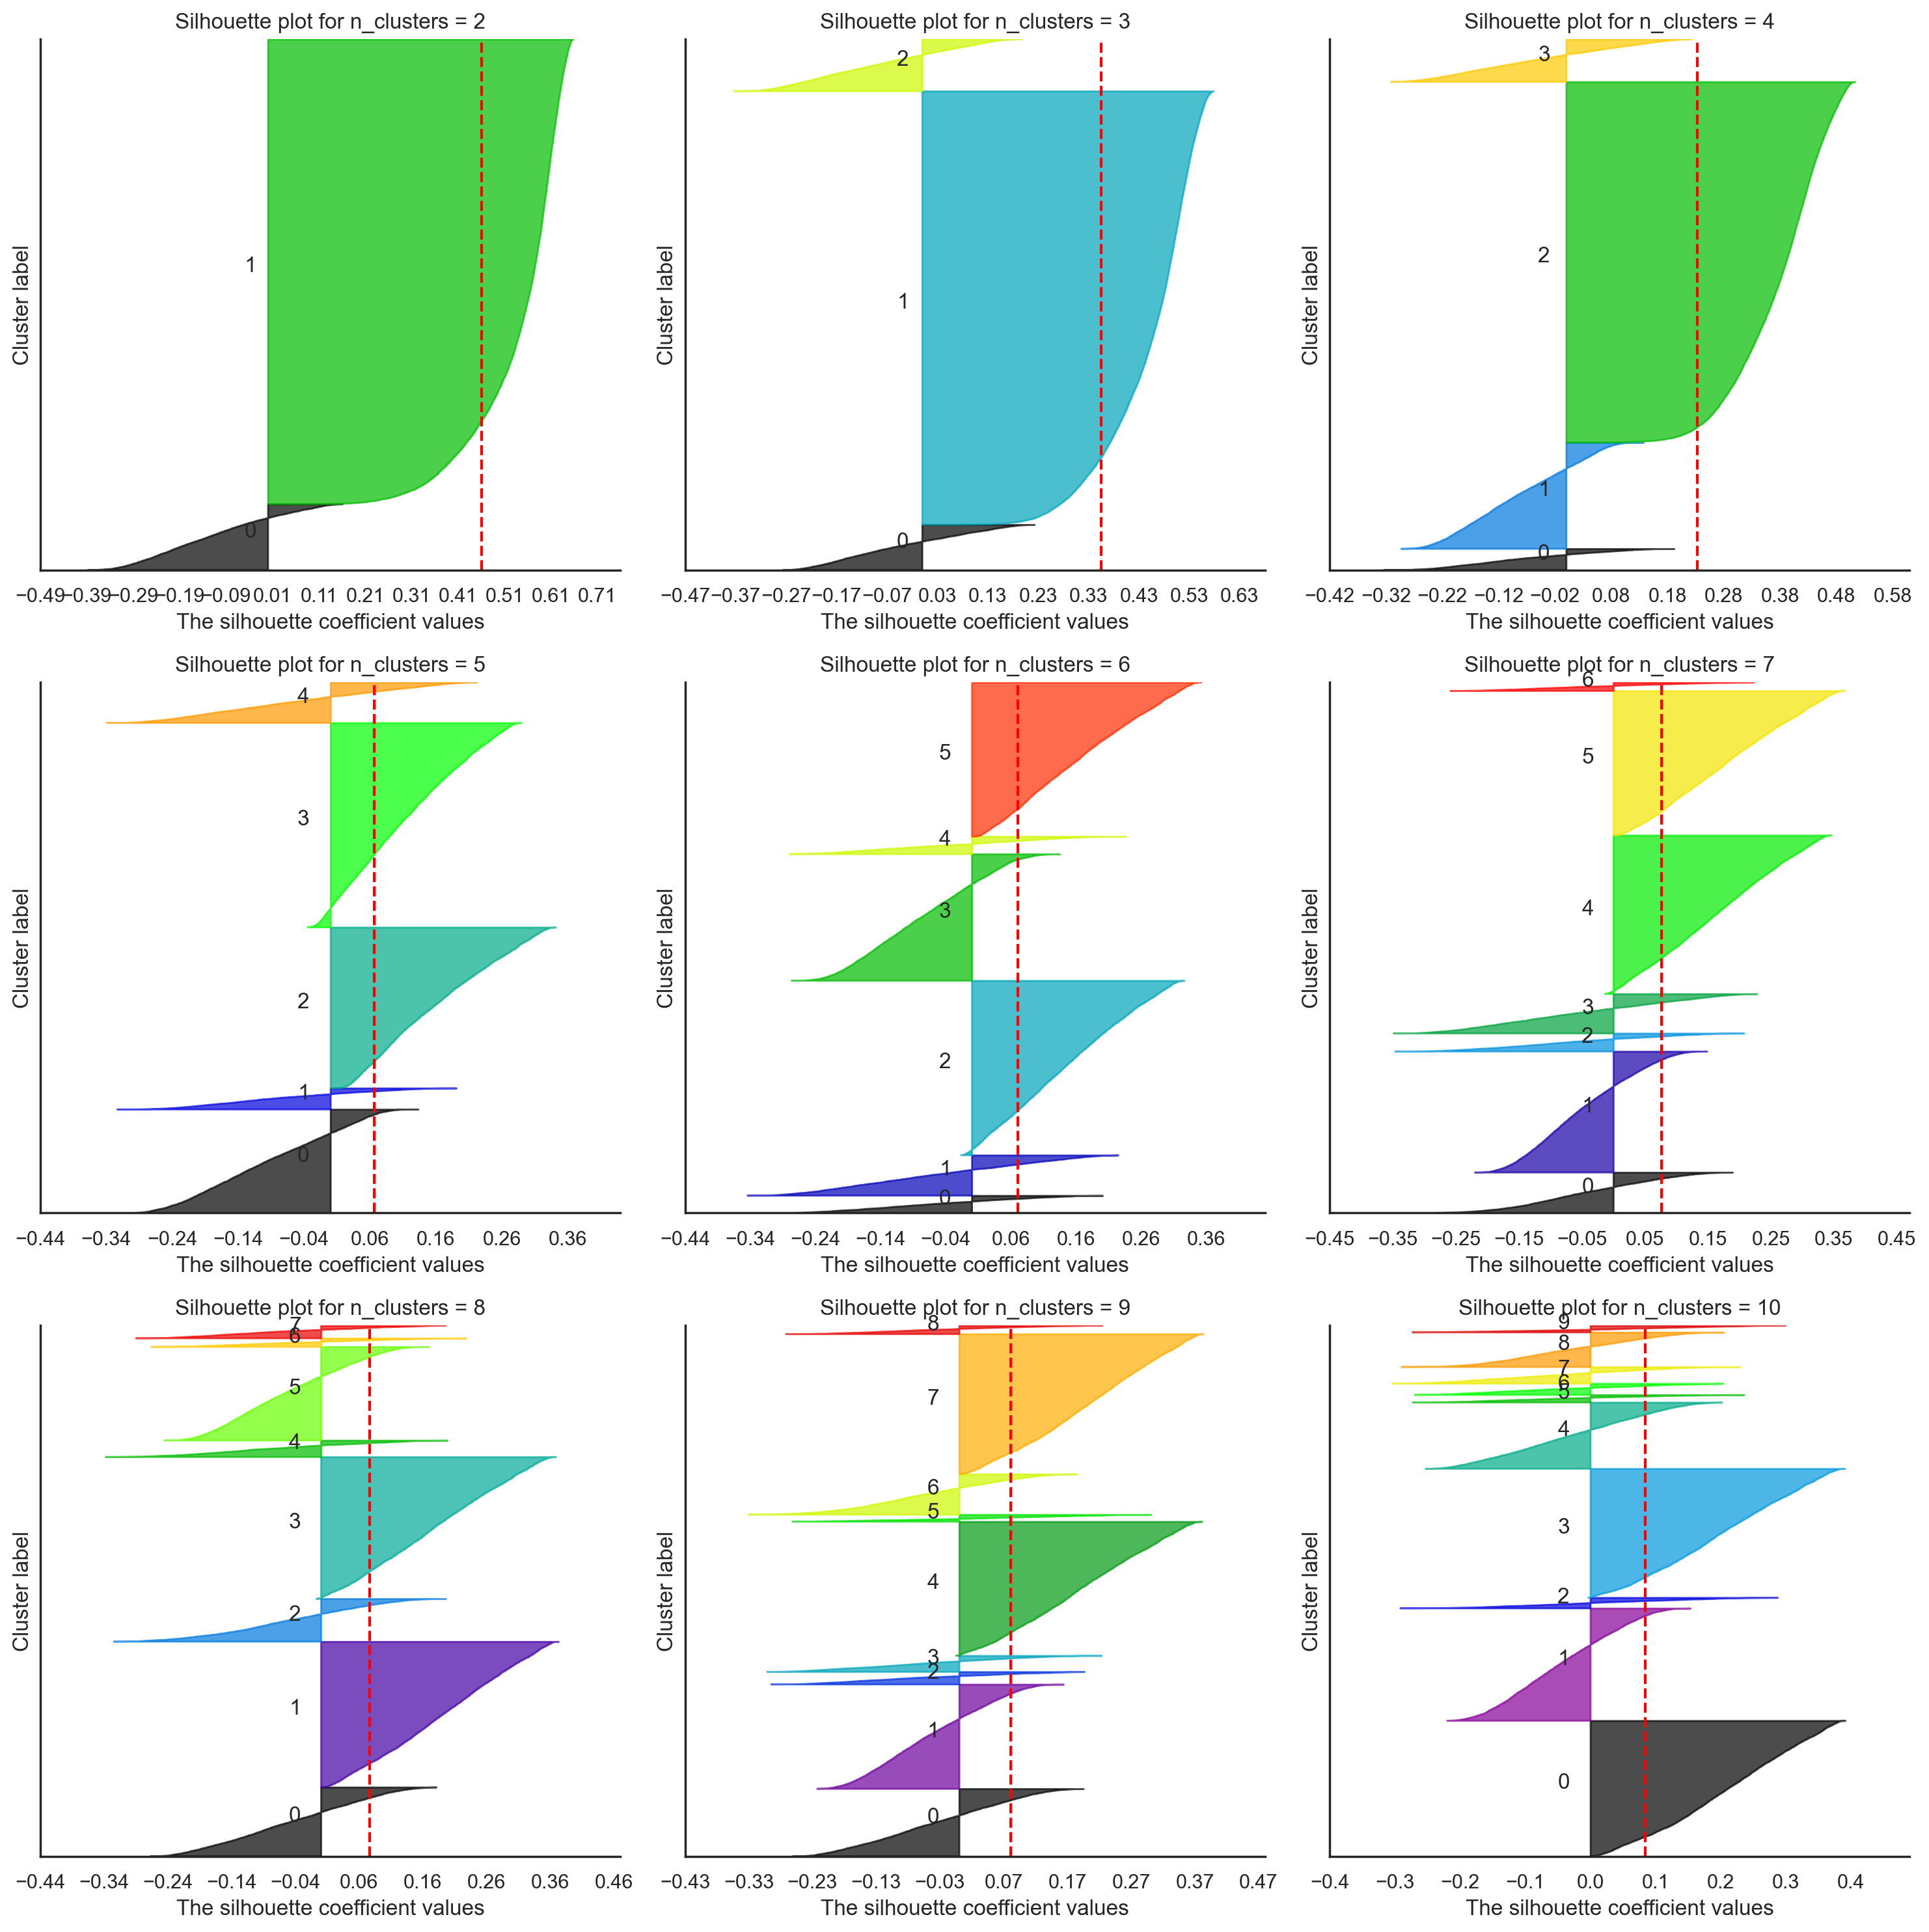

In [73]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Define the number of columns for the layout
num_columns = 3

# Store average silhouette scores
avg_silhouette = []
fig, axes = plt.subplots(
    nrows=(len(range_clusters)-1 + num_columns - 1) // num_columns,  # Calculate rows dynamically
    ncols=num_columns,
    figsize=(15, 5 * ((len(range_clusters)-1 + num_columns - 1) // num_columns))
)
axes = axes.flatten()  # Flatten the axes array to make indexing easier

for idx, nclus in enumerate(range_clusters):
    idx -= 1
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator seed for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[behavior_vars])

    # Compute the silhouette score for all samples
    silhouette_avg = silhouette_score(ABCDEats[behavior_vars], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[behavior_vars], cluster_labels)

    # Plot on the corresponding subplot
    ax = axes[idx]
    y_lower = 10
    for i in range(nclus):
        # Aggregate and sort the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = cm.nipy_spectral(float(i) / nclus)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7
        )

        # Label the silhouette plots with cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next cluster
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for n_clusters = {nclus}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Draw the average silhouette score as a vertical line
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set x and y limits
    xmin, xmax = np.round(sample_silhouette_values.min() - 0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, len(ABCDEats[behavior_vars]) + (nclus + 1) * 10])

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.arange(xmin, xmax, 0.1))

# Hide unused subplots
for i in range(len(range_clusters), len(axes)):
    fig.delaxes(axes[i])

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

> As we can see from the graphs and the average Silhouette coefficients, the best solution is k=2.

> However, since the previous metric suggested 3 clusters and this one suggests 2, we will choose 3 clusters, as 2 may be too few to provide a meaningful solution.

### **📏 Clustering Evaluation/Analysis** [Behavior-Based Segmentation]

#### **Final KMeans clustering Solution** [Behavior-Based Segmentation]

In [74]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[behavior_vars])
km_labels

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[behavior_vars], pd.Series(km_labels, name='labels_behavior', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels_behavior').mean()

first_order  last_order  \
labels_behavior                            
0                      -0.48        0.59   
1                       0.15       -0.15   
2                      -0.81        0.76   

                 CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  \
labels_behavior                                           
0                                                 -1.90   
1                                                 -0.01   
2                                                  1.73   

                 CUI_American_Cafe_Japanese_PC  CUI_Chicken_Chinese_Noodle_PC  \
labels_behavior                                                                 
0                                         1.35                           1.06   
1                                        -0.23                          -0.27   
2                                         0.74                           1.35   

                 CUI_Healthy_NOTAmerican_PC  CUI_Indian_PC  \
labels_behavior                                              
0                                     -0.11           0.20   
1                                      0.06          -0.03   
2                                     -0.36           0.12   

                 CUI_Japanese_NOTBeverages_PC  CUI_Beverages_Thai_PC  \
labels_behavior                                                        
0                                       -0.12                   0.03   
1                                        0.04                   0.01   
2                                       -0.19                  -0.08   

                 HR_Lunch_Dinner_PC  HR_LateNight_Breakfast_PC  HR_Evening_PC  \
labels_behavior                                                                 
0                             -1.08                       3.09          -0.16   
1                             -0.32                      -0.41           0.04   
2                              3.64                       0.78          -0.19   

                 HR_AfternoonSnack_PC  Sunday  Monday  Tuesday  Wednesday  \
labels_behavior                                                             
0                                0.11    0.57    0.57     0.56       0.49   
1                               -0.03   -0.22   -0.22    -0.23      -0.22   
2                                0.18    1.33    1.38     1.40       1.44   

                 Thursday  Friday  Saturday  
labels_behavior                              
0                    0.38    0.41      0.33  
1                   -0.21   -0.19     -0.19  
2                    1.40    1.24      1.28

In [76]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels_behavior'].value_counts().sort_index()
cluster_freq = df_concat['labels_behavior'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n     %
Cluster             
0         2664  8.52
1        25561 81.72
2         3054  9.76

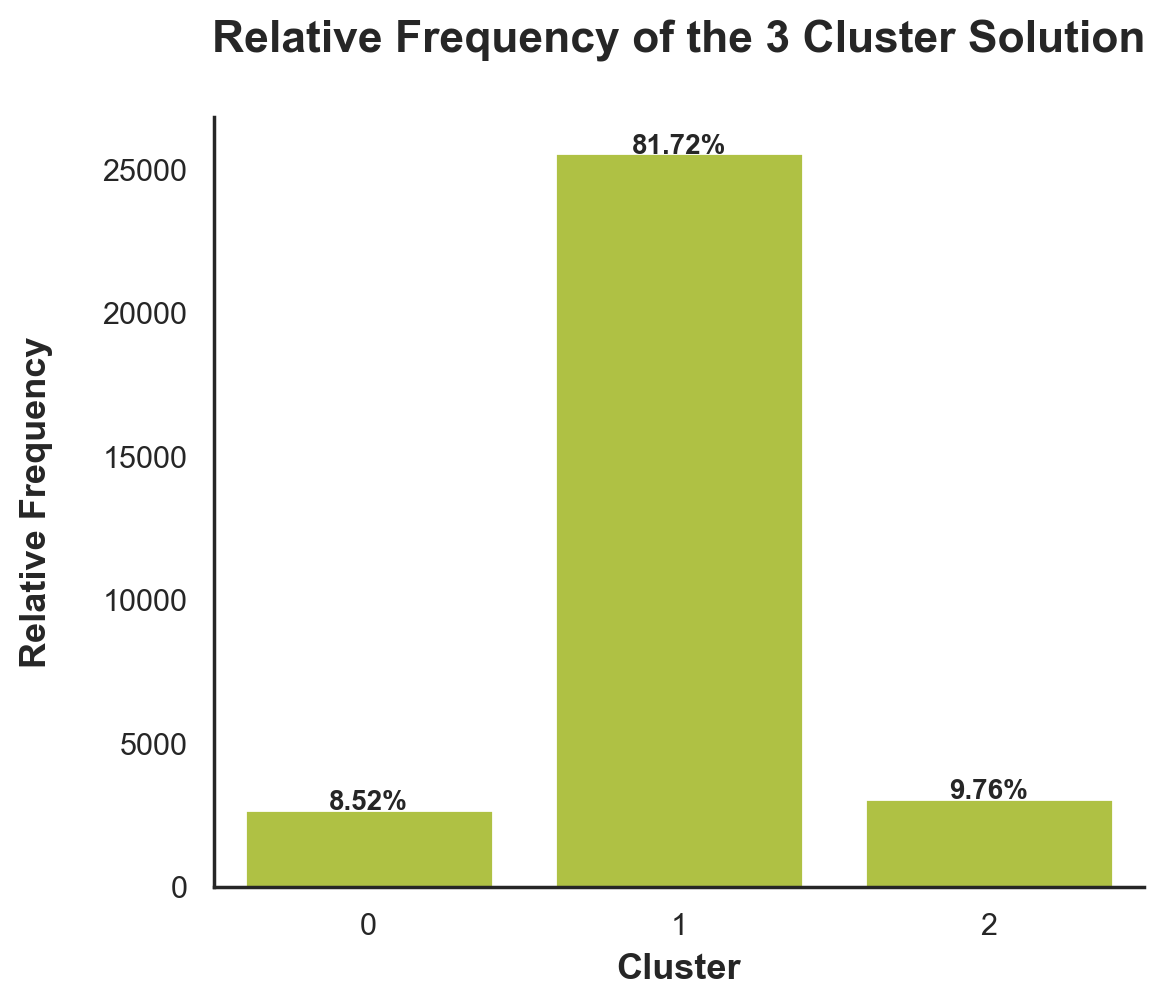

In [77]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['n'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 3 Cluster Solution\n', fontsize=16, fontweight='bold')

# Add the percentage values on top of the bars
for i in range(cluster_freq_df.shape[0]):
    plt.text(i, cluster_freq_df['n'][i] + 5, f"{cluster_freq_df['%'][i]:.2f}%", ha='center', fontsize=10, fontweight='bold')

sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
# using R² (Evaluation Metric - Behavior-based Segmentation)
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[behavior_vars])  # get total sum of squares
ssw_labels = df_concat[behavior_vars + ["labels_behavior"]].groupby(by='labels_behavior')[behavior_vars].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.2245767208411993

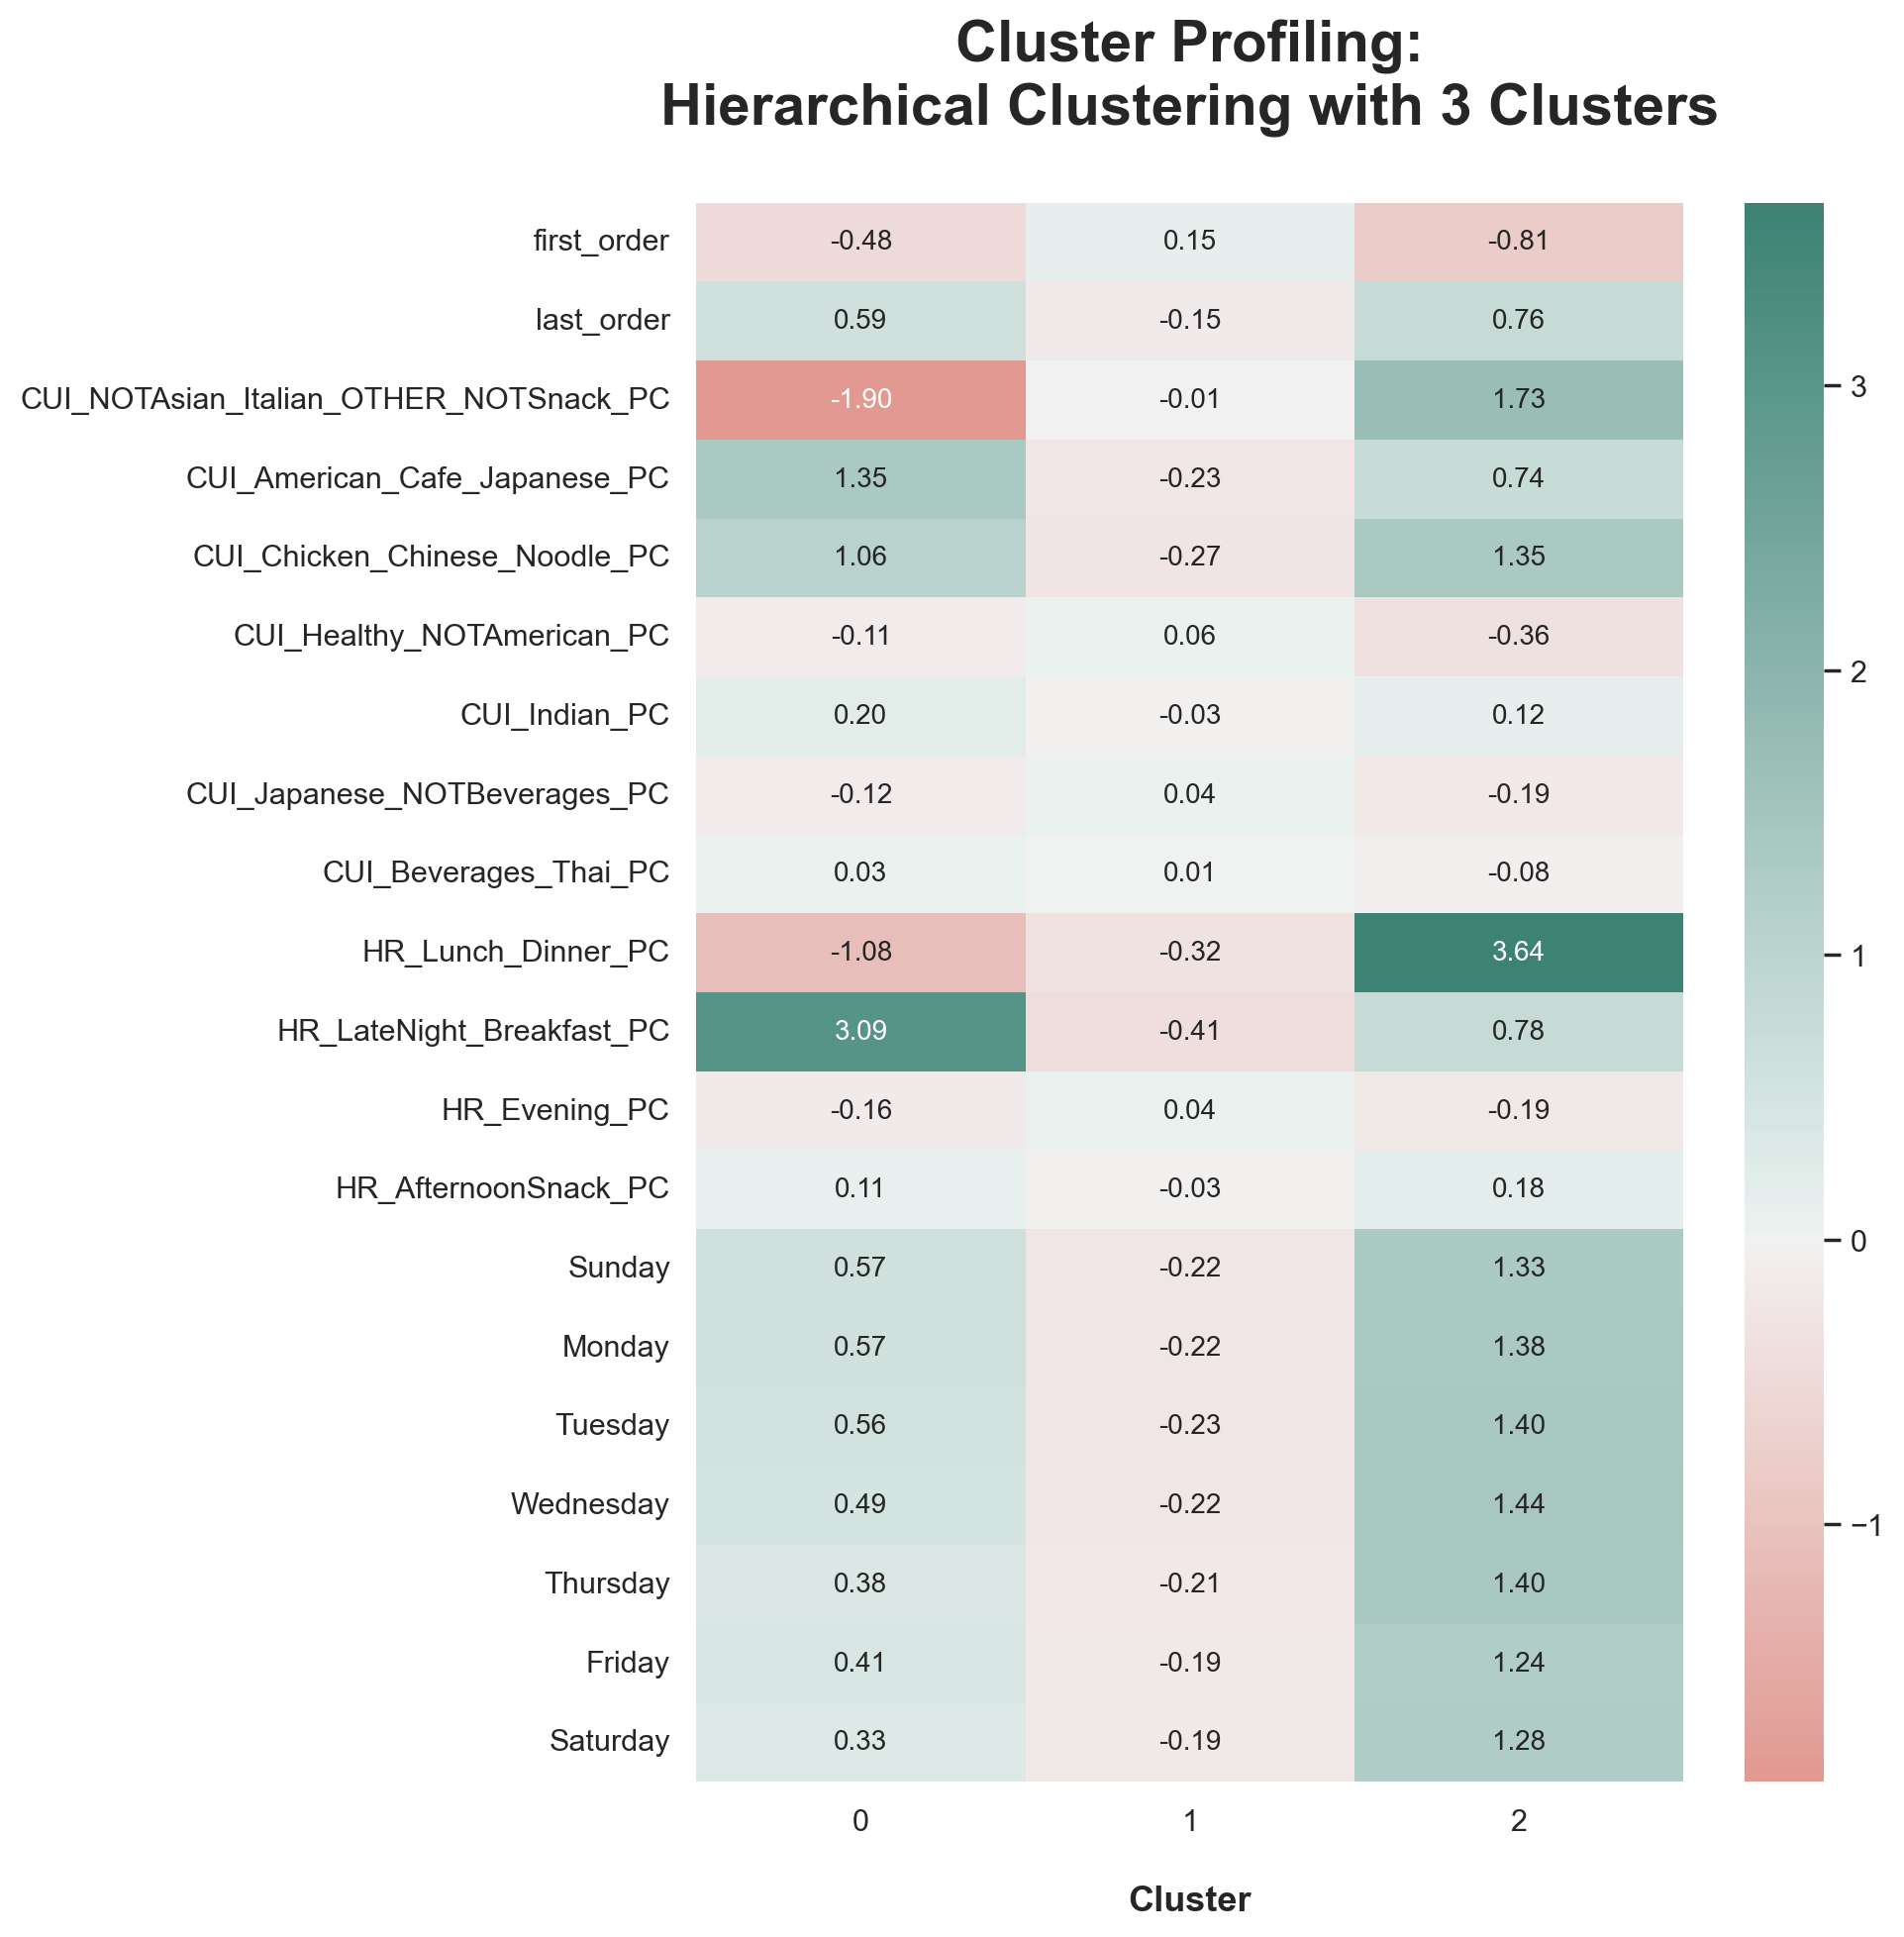

In [79]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_concat.groupby('labels_behavior').mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax, annot_kws={"size": 10})

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 3 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
# Save the cluster labels to the ABCDEats DataFrame
ABCDEats = pd.concat([ABCDEats, pd.Series(km_labels, name='labels_behavior', index=ABCDEats.index)], axis=1)

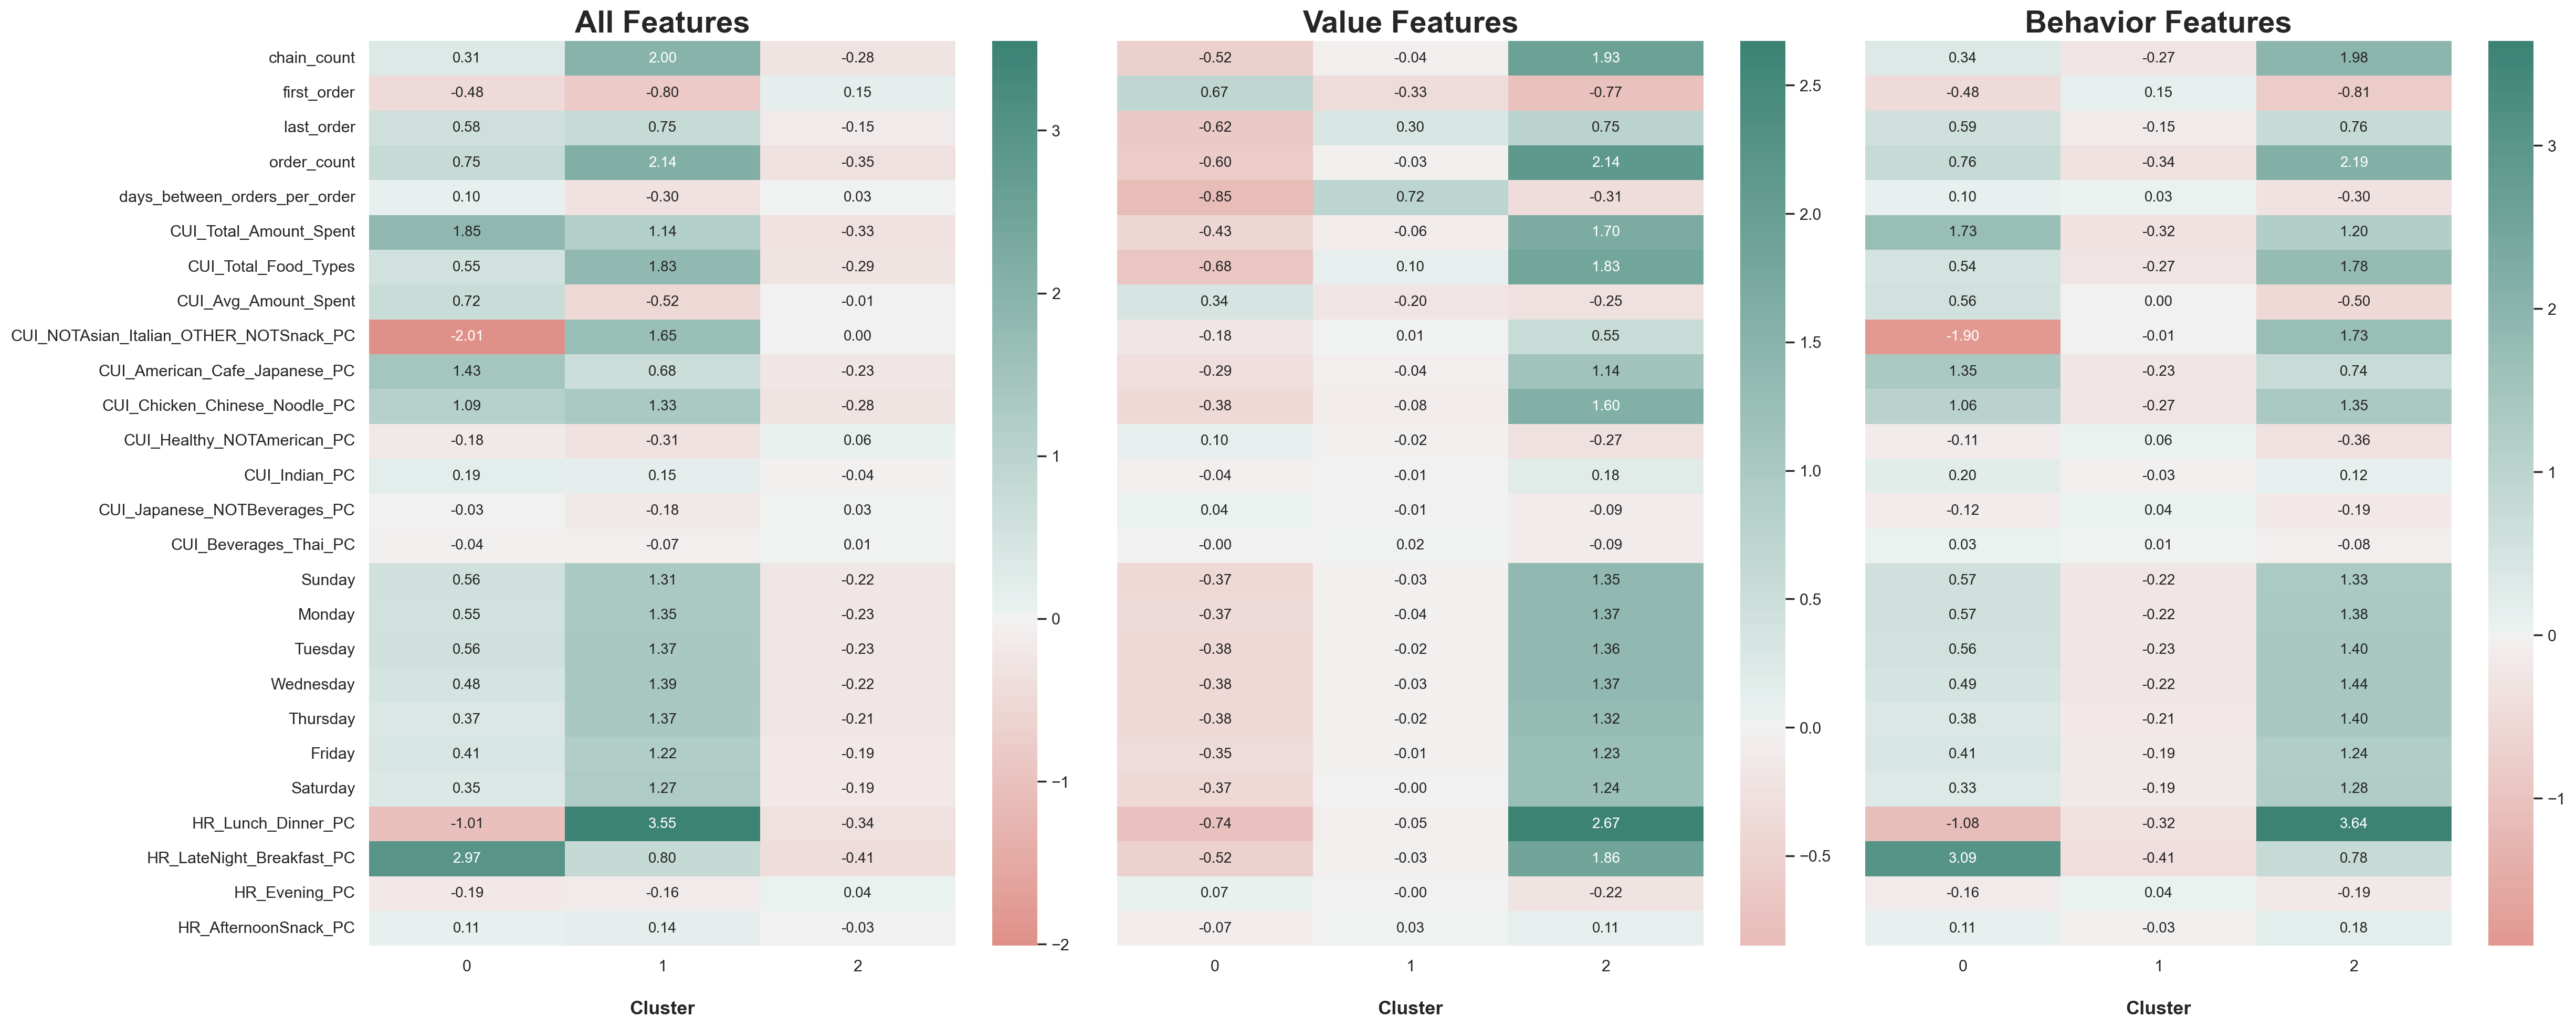

In [81]:
### Visualize the cluster means as a heatmap to the population means. [All + Value + Behavior] side by side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)

# All
sns.heatmap(ABCDEats.groupby('labels')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[0], annot_kws={"size": 10})
ax[0].set_title("All Features", fontsize=21, fontweight='bold')
    
# Value
sns.heatmap(ABCDEats.groupby('labels_value')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[1], annot_kws={"size": 10})
ax[1].set_title("Value Features", fontsize=21, fontweight='bold')

# Behavior
sns.heatmap(ABCDEats.groupby('labels_behavior')[metric_features].mean().T, cmap=cmap_, annot=True, fmt=".2f", center= 0, ax=ax[2], annot_kws={"size": 10})
ax[2].set_title("Behavior Features", fontsize=21, fontweight='bold')

# Finalize the plot
for i in range(3):
    ax[i].set_xlabel('\nCluster', fontsize=13, fontweight='bold')
    ax[i].tick_params(axis='both', which='major', labelsize=11)
    
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_All_Value_Behavior.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **💾 Save ***KMeans*** Clustering Solution**

In [82]:
# Save the cluster labels of the 4 Cluster Solution [K-Means] to a parquet file [index + labels]
ABCDEats[['labels', 'labels_value', 'labels_behavior']].to_parquet('data/DM2425_ABCDEats_KMeansClustering.parquet', index=True)

---